# Classificando a renda de indivíduos adultos de censo americano

Sempre que um país precisa saber como está a condição de vida da sua população nos municípios é necessário fazer um levantamento dos dados dessa população é a principal referência sobre a situação dessa população. Essa pesquisa sobre a totalidade da população é chamada de censo demográfico ou recenseamento da população e vai além de uma mera contagem da população, pois busca conhecer as características dos habitantes e condições sócioeconômicas (salário, tipo de emprego, número de filhos, idade, etc).

O censo demográfico é realizado no Brasil desde 1872, mas a partir de 1940 o censo demográfico é realizado pelo Instituto Brasileiro de Geografia e Estatísticas (IBGE). O último censo foi realizado em 2010 e o próximo está agendado para 2021 (seria em 2020, mas foi adiado pela pandemia do novo coronavírus).

Nos Estados Unidos o censo é realizado pelo *United States Census Bureau* e anualmente são feitas projeções sobre a população americana com base no censo feito anteriormente. O último censo americano foi realizado no ano de 2020 e essas informações podem ser acessadas [aqui](https://data.census.gov/cedsci/).

Nesse projeto irei usar dados de um censo americano determinar se os indvíduos ganham ou não acima de USD 50.000 (cinquenta mil dólares) anualmente. Para o processo de classificação usarei os atributos descritos abaixo:


## Sobre os dados

Os dados podem ser obtidos [aqui](https://archive.ics.uci.edu/ml/datasets/Adult).

**1)** age (idade);

**2)** workclass (classe de trabalho): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked;

**3)** fnlwgt (peso final);

**4)** education (educação): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool;

**5)** education-num (educação em anos);

**6)** marital-status (situação conjugal): Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse;

**7)** occupation (ocupação) : Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces;

**8)** relationship (relação): Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried;

**9)** race (raça): White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black;

**10)** sex (sexo): Female, Male;

**11)** capital-gain (capital ganho);

**12)** capital-loss (capital perdido);

**13)** hours-per-week (horas de trabalho por semana);

**14)** native-country (país nativo): United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands;

**15)** Income (Renda) :>50K (acima de USS 50.000), <=50K (igual ou abaixo de USS 50.000).


## Etapas

1) Importação das Bibliotecas e dos dados

2) Análise Exploratória

3) Tratamento dos dados

4) Definição da Baseline

5) Separação dos dados de treino e teste

6) Modelagem e avaliação dos modelos

7) Conclusão

# Importação das bibliotecas e dos dados

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)

Importando os dados.

In [2]:
adult=pd.read_csv('adult.csv')

## Análise exploratória dos dados

Visualizando as colunas do *dataset*.

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


6 colunas são de números inteiros e 9 colunas são objetos.

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Nenhuma coluna possui valores faltantes.

In [5]:
adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Dimensão da base de dados

Temos 32561 linhas (ou observações) e 14 colunas.

In [6]:
adult.shape

(32561, 15)

#### Estatísticas descritivas de cada coluna

A primeira tabela refere-se as colunas que são objetos e a segunda tabela, de colunas com valores inteiros e *float*.

In [7]:
print('Tabela das colunas do tipo objeto')
display(adult.describe(include=['O']))
print(''*254)
print('Tabela das colunas do tipo inteiro e float')
display(adult.describe())

Tabela das colunas do tipo objeto


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720



Tabela das colunas do tipo inteiro e float


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Análise gráfica dos dados

A frequência maior está com pessoas com idade menor que 50 anos.

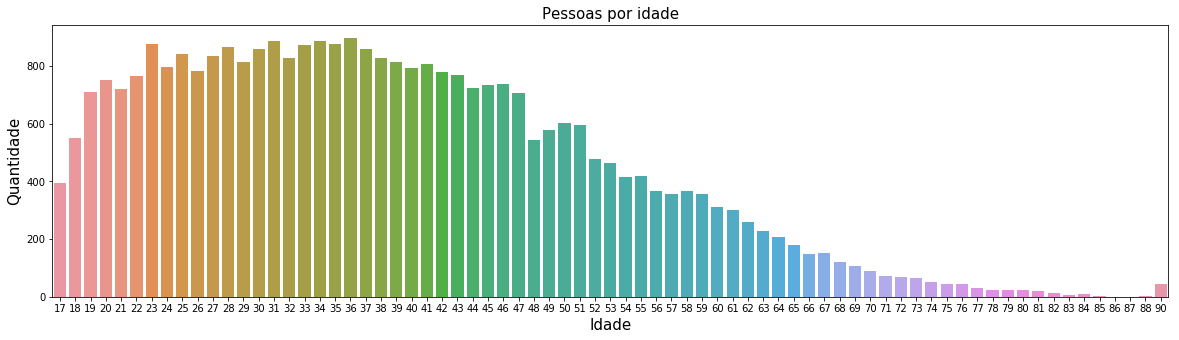

In [8]:
plt.figure(figsize=(20,5))
sns.countplot(x='age',data=adult)
plt.xlabel('Idade',size=15)
plt.ylabel('Quantidade',size=15)
plt.title('Pessoas por idade',size=15)
plt.show()

Segregando idade por renda, vemos que nem todas as idades possuem pessoas com renda acima de 50 mil dólares. Os mais novos são os que menos acima de 50 mil/ano. A concentração está mais entre aqueles que possuem entre 30 e 50 anos.

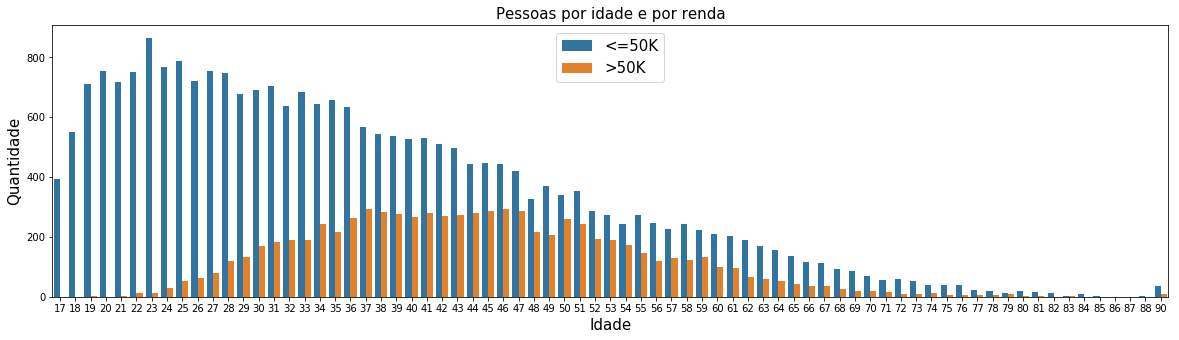

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(x='age',data=adult,hue='income')
plt.xlabel('Idade',size=15)
plt.ylabel('Quantidade',size=15)
plt.title('Pessoas por idade e por renda',size=15)
plt.legend(fontsize=15)
plt.show()

Abaixo a distribuição da coluna idade.

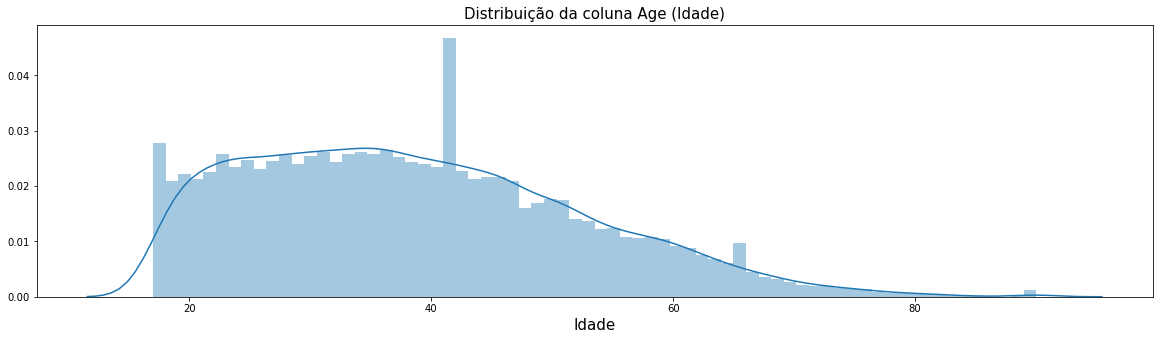

In [10]:
plt.figure(figsize=(20,5))
ax_hist=sns.distplot(adult['age'],bins=70)
plt.xlabel('Idade',size=15)
plt.title('Distribuição da coluna Age (Idade)',size=15)
plt.show()

O histograma das dados das idade daqueles que ganham abaixo de USD 50.000 se assemelha mais com uma distribuição normal, pois parece ser mais simpetrica (A idades estão concentradas entre 30 a 50 anos). Já os dados de idades daqueles que ganham acima de USD 50.000 não se parece com uma normal e os dados estão concentrados muito a esquerda (assimétrica).

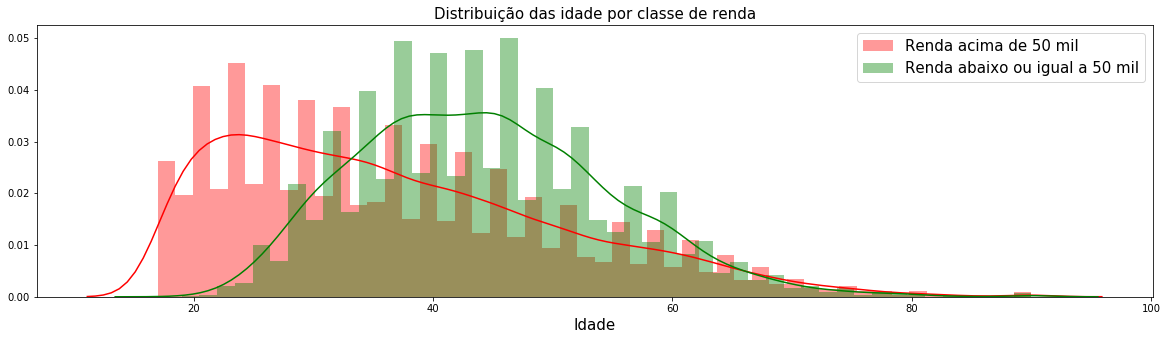

In [11]:
plt.figure(figsize=(20,5))
sns.distplot(adult['age'].loc[adult['income']=='<=50K'] , color="red", label="Abaixo de US$ 50K")
sns.distplot(adult['age'].loc[adult['income']=='>50K'] , color="green", label="Acima de US$ 50K")
plt.xlabel('Idade',size=15)
plt.title('Distribuição das idade por classe de renda',size=15)
plt.legend(['Renda acima de 50 mil','Renda abaixo ou igual a 50 mil'],fontsize=15)
plt.show()

O gráfico de barra a baixo mostra que é mais frequente que pessoas desse conjunto de dados tenham salários abaixo de 50 mil
dólares. Podemos perceber também que as classes estão desbalanceadas, o que pode ser um problema na hora de colocar o modelo
para treinar e classificar os dados, portanto trataremos esse problemas mais a frente.

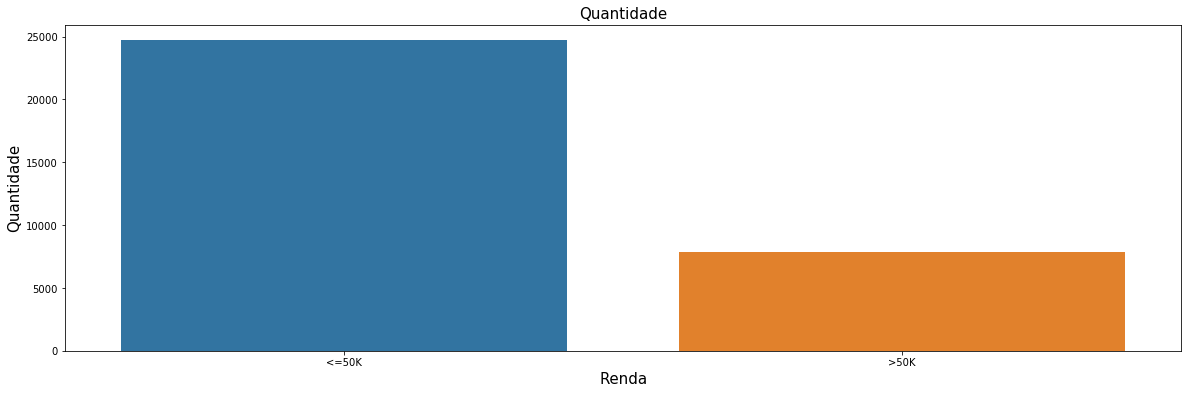

In [12]:
plt.figure(figsize=(20,6))
sns.countplot(x='income',data=adult)
plt.xlabel('Renda',size=15)
plt.ylabel('Quantidade',size=15)
plt.title('Quantidade',size=15)
plt.show()

Nesse censo foram identificados mais homens do que mulheres e há mais homens que ganham acima de US$ 50.000 do que mulheres.

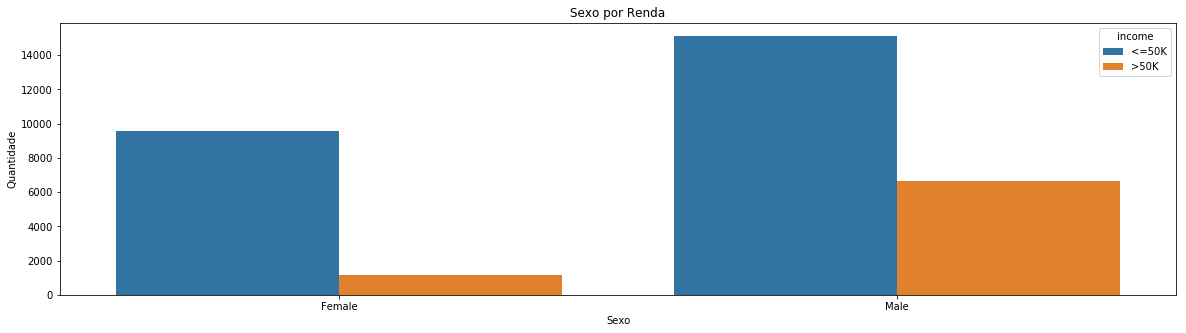

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(x='sex',data=adult,hue='income',orient="h")
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Sexo por Renda')
plt.show()

A maior parte das pessoas desse censo estão trabahando no setor privado e daqueles que trabalham no setor privado, a maioria ganha menos de US$ 50.000. 

Dentre as classes de trabalho, na dos autônomos que trabalham em entidades corporativas (*self-emp-ic*), a maioria recebe acima de US$ 50.000. É a única classe de trabalhador que tem mais pessoas ganham acima de 50 mil do que ganham abaixo desse valor.

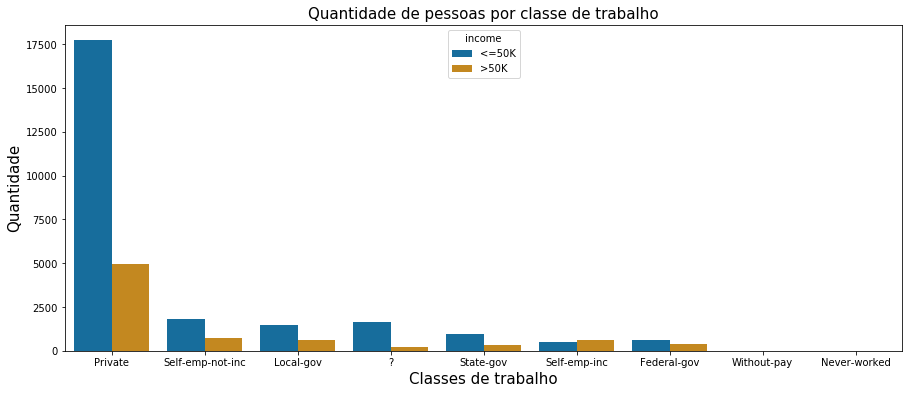

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='workclass',data=adult,hue='income',palette='colorblind',order=
              adult['workclass'].value_counts(ascending=False).index)
plt.xlabel('Classes de trabalho',size=15)
plt.ylabel('Quantidade',size=15)
plt.title('Quantidade de pessoas por classe de trabalho',size=15)
plt.show()

A grande maioria dos trabalhadores é composta por quem possui ensino médio, *some-college* (está cursando alguma faculdade) e possui bacharelado. Daqueles que recebem acima de USD 50.000 são maioria entre doutores, professores de escola e mestres.

Porém a maior parte de quem recebe acima de US$ 50.000 tem ensino médio, cursam/cursaram alguma faculdade, bacharel e mestrado (as 4 primeiras colunas de cor laranja do gráfico abaixo).

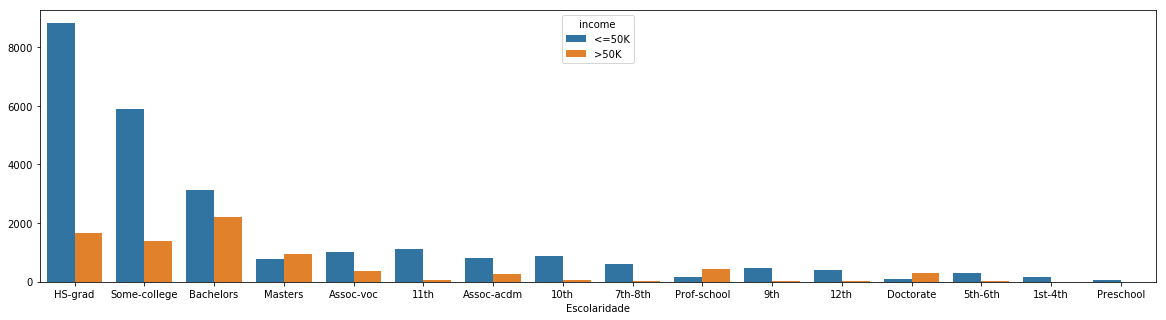

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(x='education',hue='income',data=adult,order =
              adult['education'].value_counts(ascending=False).index)
plt.xlabel('Escolaridade')
plt.ylabel('')
plt.show()

A maior concentração de pessoas que ganham menos de US$ 50.000 são pessoas que tem tempo de educação de 9, 10 e 13 anos.

Dos 14 anos de educação em diante a maior parte dos trabalahdores ganham acima de USD 50.000 (14,15 e 16), porém a quantidade desses é pouco expressiva. 

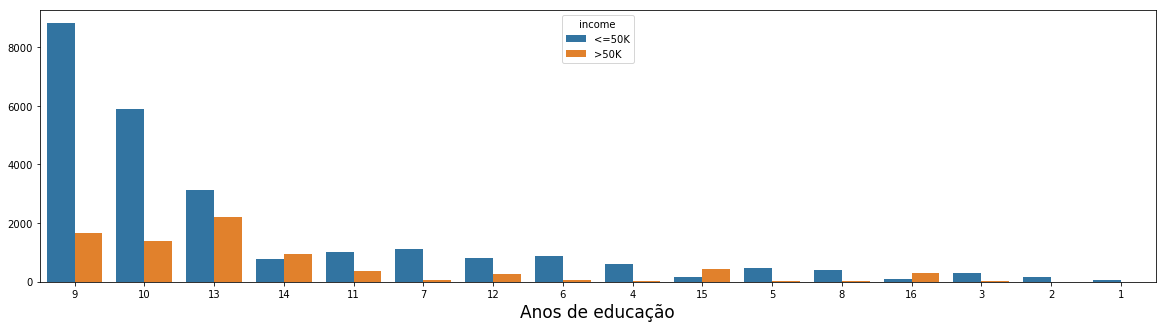

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(x='education.num',hue='income',data=adult,order =
              adult['education.num'].value_counts(ascending=False).index)
plt.xlabel('Anos de educação',size=17)
plt.ylabel('')
plt.show()

A maior parte das pessoas do censo são casados (conjugê civil), solteiros ou divorciados.

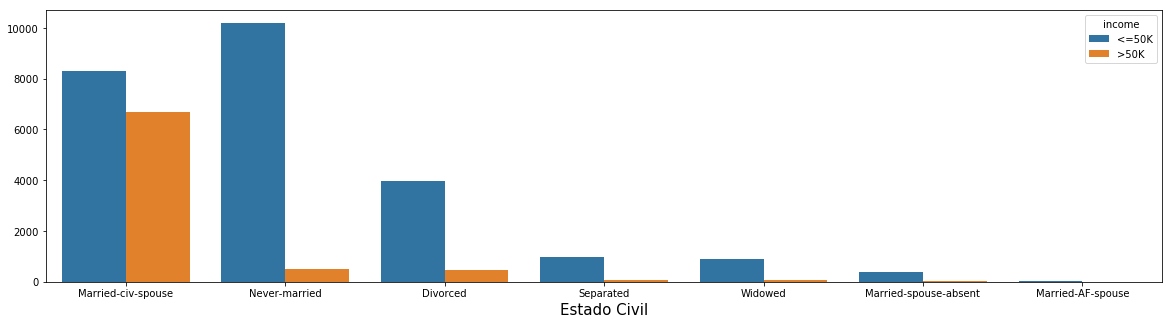

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x='marital.status',data=adult,hue='income',order =
              adult['marital.status'].value_counts(ascending=False).index)
plt.xlabel('Estado Civil',size=15)
plt.ylabel('')
plt.show()

A maior parte das pessoas que participaram do censo são em sua maioria de brancos e são os brancos que, marjoritariamente, ganham acima de US$ 50.000.

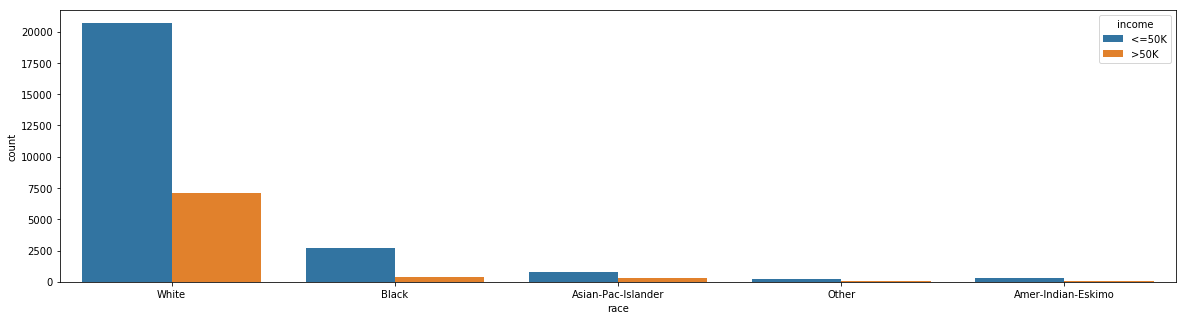

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x='race',data=adult,hue='income',orient="h")
plt.show()

Quem mais ganha acima de US$ 50.000 são maridos.

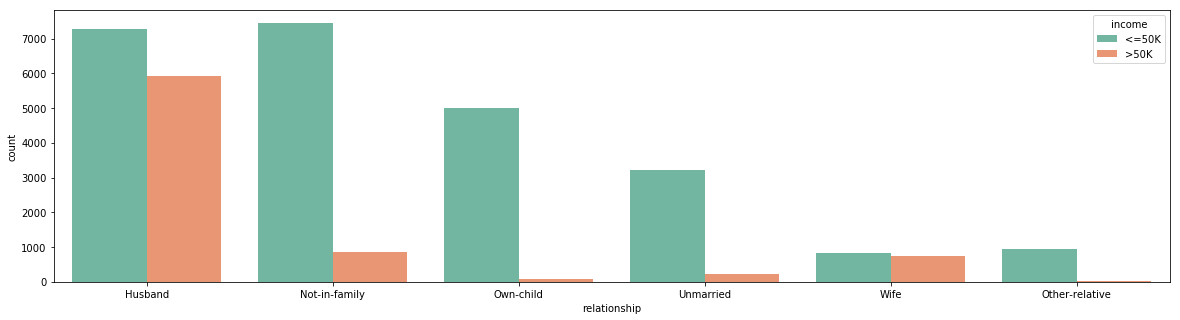

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='relationship',hue='income',data=adult,palette='Set2',order =
              adult['relationship'].value_counts(ascending=False).index)
plt.show()

As ocupações que mais recebem acima de USD 50.000 são : *Prof-specialty, Craft-repair, Exec-managerial, Adm-Clerical* e *Sales*

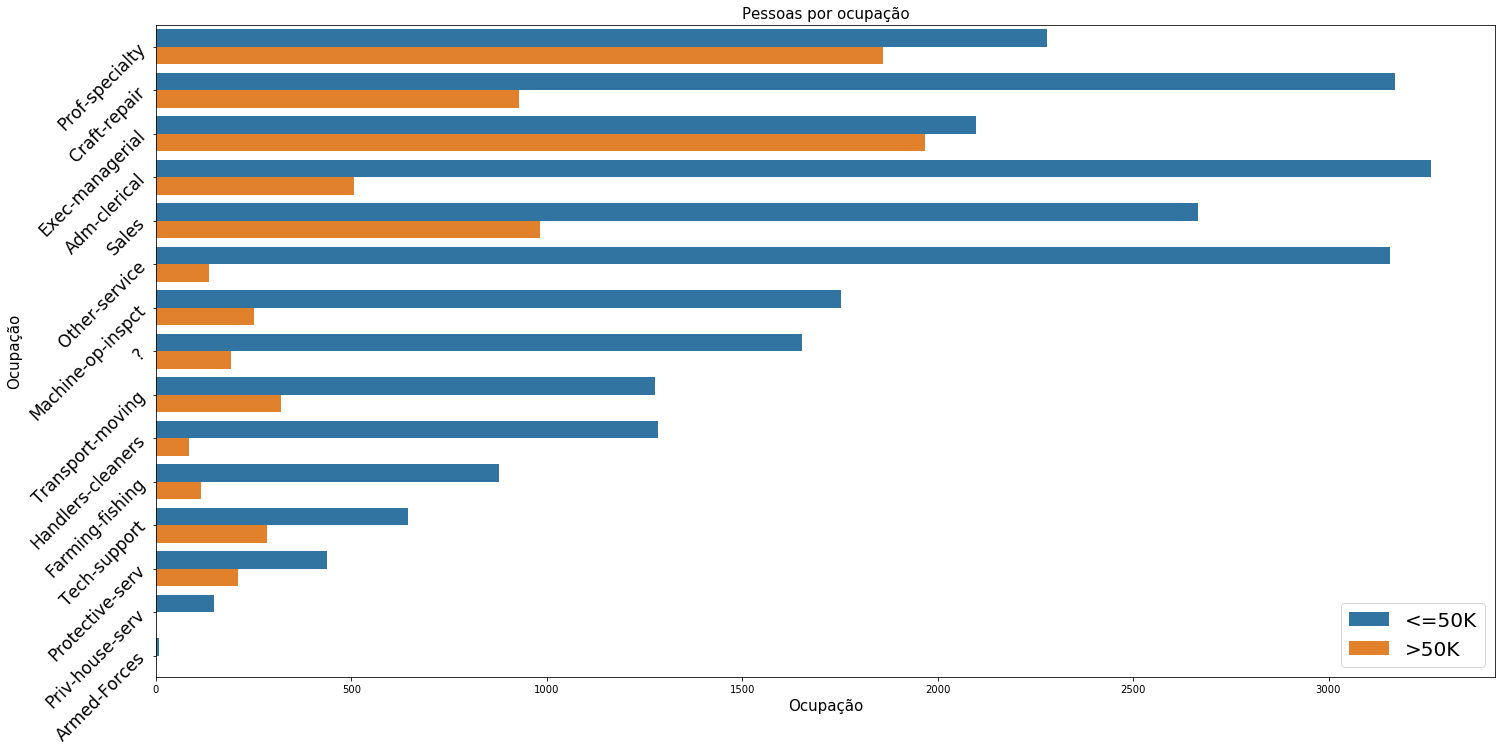

In [20]:
plt.figure(figsize=(24,12))
sns.countplot(y='occupation',data=adult,hue='income',order = adult['occupation'].value_counts(ascending=False).index)
plt.xlabel('Ocupação',size=15)
plt.ylabel('Ocupação',size=15)
plt.title('Pessoas por ocupação',size=15)
plt.yticks(rotation='45',size=17)
plt.legend(fontsize=20, loc=4)
plt.show()

A maioria dos indivíduos do censo trabalha 40 horas por semana.

Dos que ganham abaixo de 50 mil por ano a maioria trabalha entre menos de 40 horas semanais até 40 horas. Já os que ganham acima de 50 mil por ano trabalham mais de 40 horas semanais.

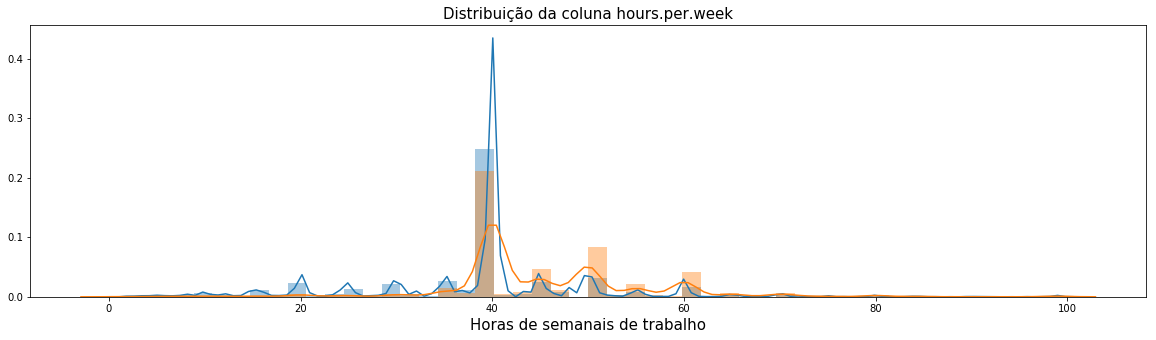

In [21]:
plt.figure(figsize=(20,5))
sns.distplot(adult['hours.per.week'].loc[adult['income']=='<=50K'])
sns.distplot(adult['hours.per.week'].loc[adult['income']=='>50K'])
plt.xlabel('Horas de semanais de trabalho',size=15)
plt.title('Distribuição da coluna hours.per.week',size=15)
plt.show()

Marjoritariamente, as pessoas da pesquisa são dos Estados Unidos e são justamente os americanos que recebem mais de 50 mil por ano.

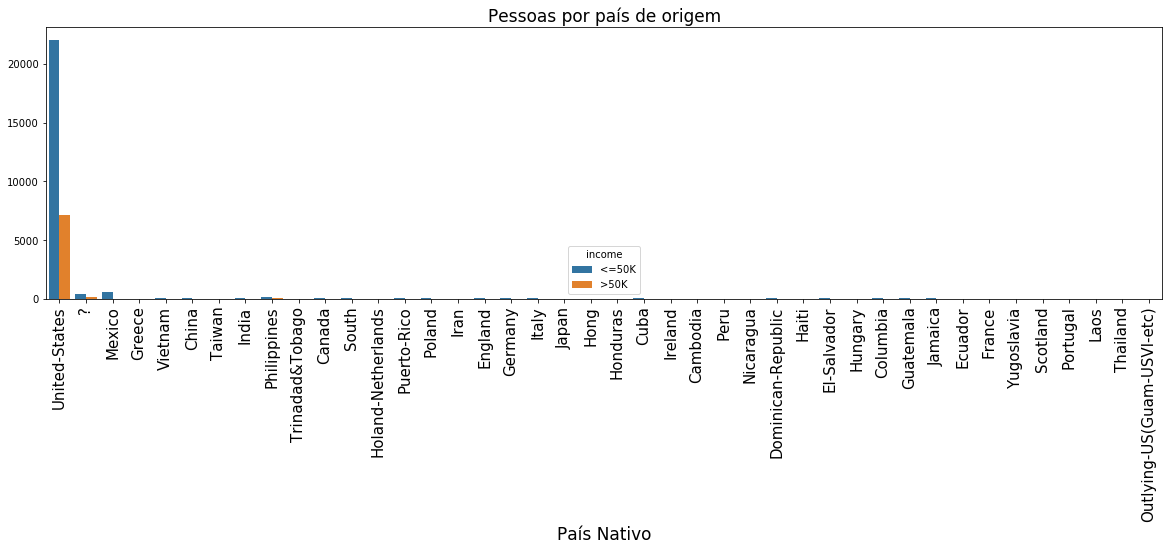

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x='native.country',hue='income',data=adult)
plt.xlabel('País Nativo',size=17)
plt.ylabel('')
plt.title('Pessoas por país de origem',size=17)
plt.xticks(rotation='90',size=15)
plt.show()

Se retirarmos os Estados Unidos teremos cidadãos de 41 países, como vemos abaixo.

In [23]:
display(adult['native.country'].unique())
display(len(adult['native.country'].unique()))

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

42

vamos substituir, o que não for *United States* simplesmente por *Others*.

In [24]:
adult['native.country']=adult['native.country'].replace(['?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],'Others')

Com a nova modeificação vemos que 7171 pessoas americanas ganham acima de 50 mil por anos e dos outros países apenas 670.

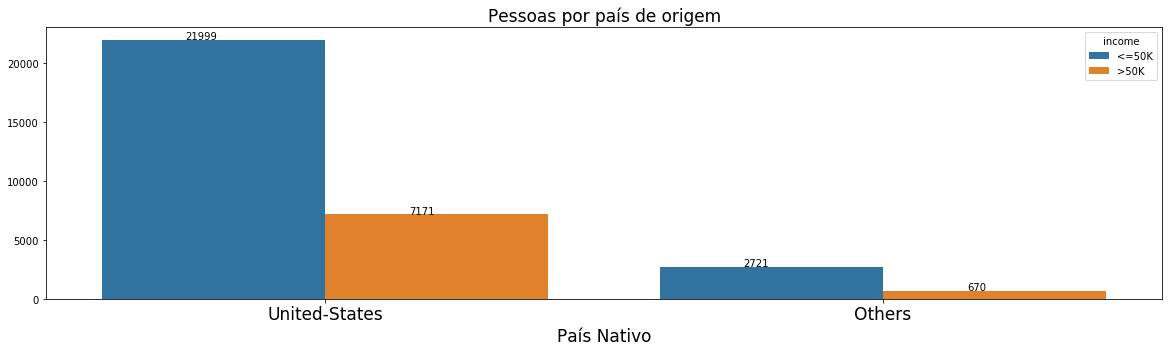

In [25]:
plt.figure(figsize=(20,5))
dx=sns.countplot(x='native.country',hue='income',data=adult)
plt.xlabel('País Nativo',size=17)
plt.ylabel('')
plt.title('Pessoas por país de origem',size=17)
plt.xticks(size=17)

for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+50))
plt.show()

A maioria das pessoas do cendo não tiveram ganho de capital.

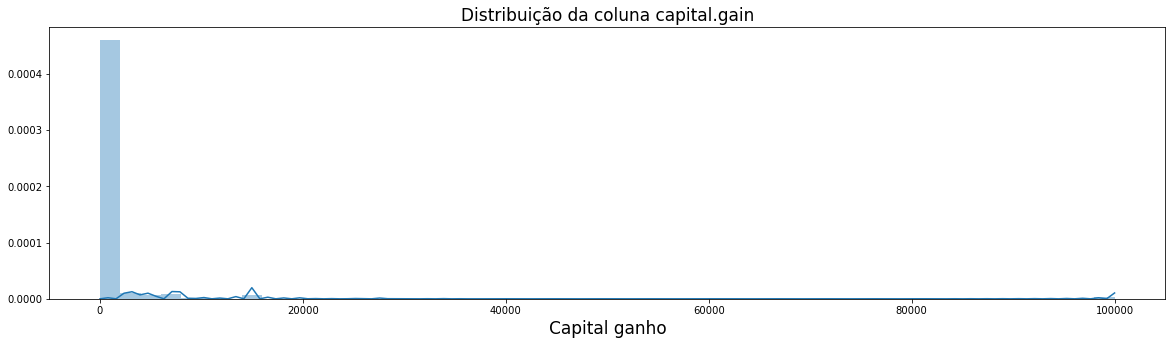

In [26]:
plt.figure(figsize=(20,5))
sns.distplot(adult['capital.gain'], kde_kws={'bw':0.1})
plt.xlabel('Capital ganho',size=17)
plt.title('Distribuição da coluna capital.gain',size=17)
plt.show()

A maioria das pessoas não tiveram perda de capital.

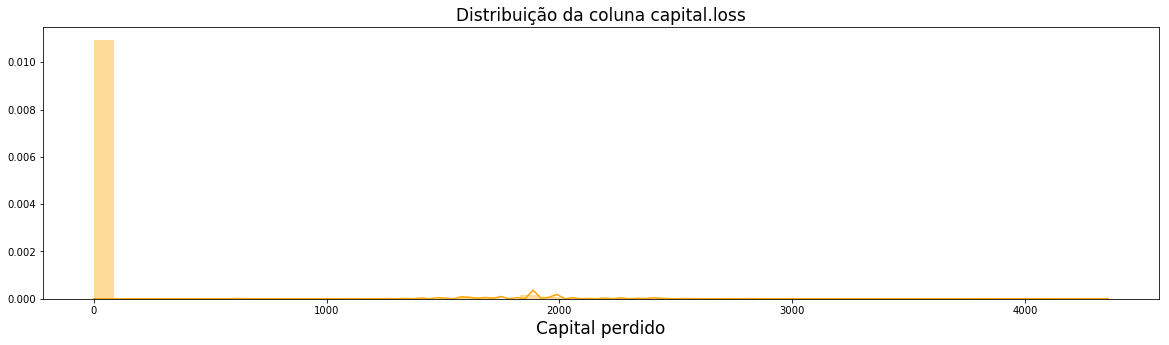

In [27]:
plt.figure(figsize=(20,5))
sns.distplot(adult['capital.loss'],color='orange',kde_kws={'bw':0.1})
plt.xlabel('Capital perdido',size=17)
plt.title('Distribuição da coluna capital.loss',size=17)
plt.show()

Agora vamos ver a distribuição da diferença entre o ganho e a perda de capital.

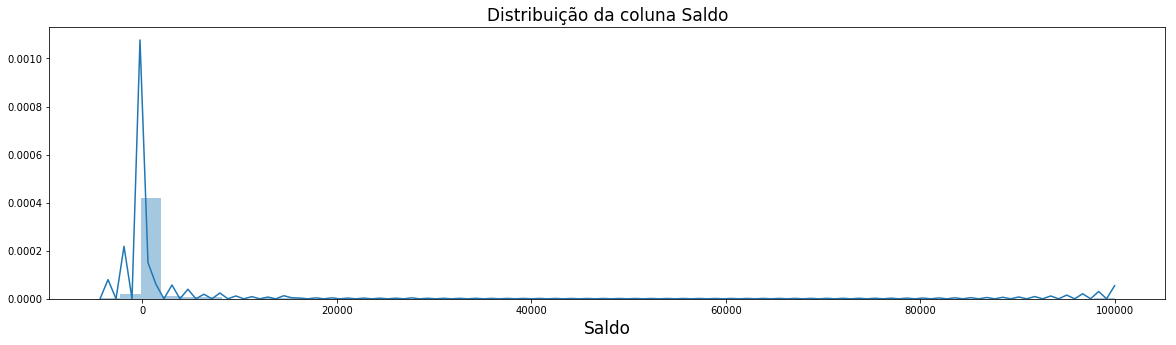

In [28]:
adult['saldo']=adult['capital.gain']-adult['capital.loss']
plt.figure(figsize=(20,5))
sns.distplot(adult['saldo'],kde_kws={'bw':0.1})
plt.title('Distribuição da coluna Saldo',size=17)
plt.xlabel('Saldo',size=17)
plt.show()

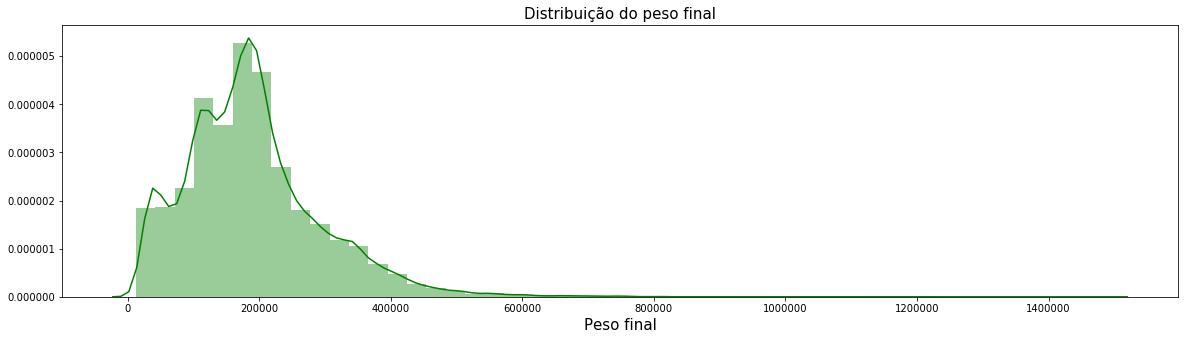

In [29]:
plt.figure(figsize=(20,5))
sns.distplot(adult['fnlwgt'],color='green')
plt.title('Distribuição do peso final',size=15)
plt.xlabel('Peso final',size=15)
plt.show()

As distribuições de *fnlwgt* por classe de renda são bastante semenlhantes.

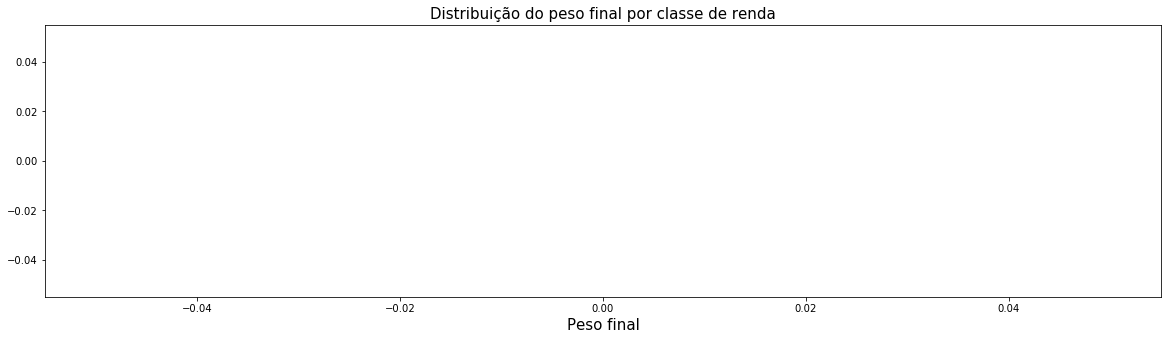

In [30]:
plt.figure(figsize=(20,5))
sns.distplot(adult['fnlwgt'].loc[adult['income']==1] , color="red", label="Abaixo de US$ 50K")
sns.distplot(adult['fnlwgt'].loc[adult['income']==0] , color="yellow", label="Acima de US$ 50K")
plt.xlabel('Peso final',size=15)
plt.title('Distribuição do peso final por classe de renda',size=15)
plt.show()

## Tratamento dos dados

Vamos olhar novamente as informações sobre os dados.

Temos 8 colunas que são valores inteiros e 8 que são do tipo objeto.

In [31]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
 15  saldo           32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


Vamos primeiro transformar a variável *target* *income* com o método *Label encoder* em um variável categóricas numéricas, onde o valor será 0 ou 1.

In [32]:
adult['income']=LabelEncoder().fit_transform(adult['income'])

### Tratando as colunas que são objetos

Agora vamos tratar as colunas por tipo e as primeiras a serem tratadas são as colunas do tipo objeto e vamos visualizá-las antes.Vemos que há algumas colunas que possuem muitos valores categóricos como as colunas:

1) *workclass* que possui 9 valores únicos

2) *education* com 16 valores únicos

3) e *ocupation*, 15 valores únicos

Podemos fazer a mesma estratégia que fizemos em native.country que antes tinha 42 categorias, mas agora possui apenas 2 classes.

In [33]:
display(adult.select_dtypes(include='object').nunique())

workclass          9
education         16
marital.status     7
occupation        15
relationship       6
race               5
sex                2
native.country     2
dtype: int64

#### Tratando a coluna worclass

Aqui podemos que, novamente, que a categoria *Private* tem um total de 22696 (69,7%) e os demais somados 9.865 (30.3%)

Seria interessante então definirmos quem está no setor privado e quem não está, assim susbtituiremos as demais categorias por *NoPrivate*

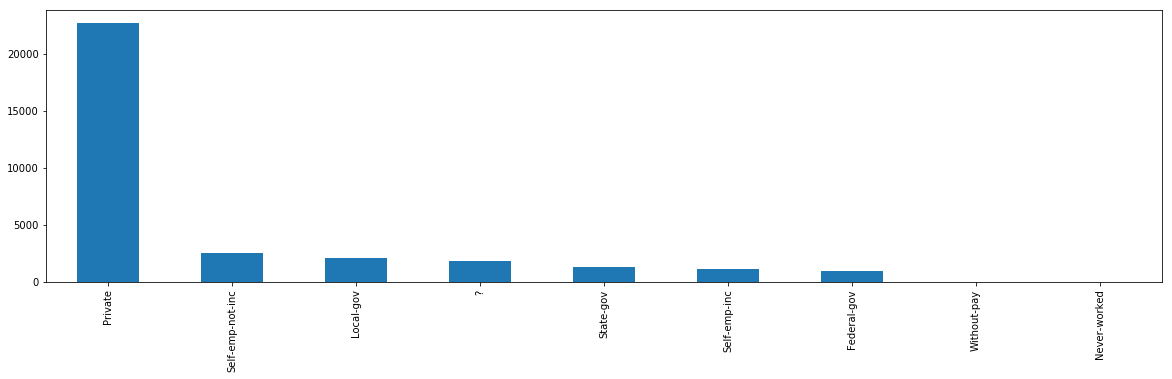

In [34]:
plt.figure(figsize=(20,5))
adult['workclass'].value_counts().plot.bar();

Vamos substituir todos os que não estão no setor privado por apenas *NoPrivate*.

In [35]:
adult['workclass']=adult['workclass'].replace(['?','Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov',
                                             'Without-pay','Never-worked'],'NoPrivate')

Vemos que a alteração foi bem sucedida, agora temos apenas duas classes na coluna *workclass*.

In [36]:
adult['workclass']

0        NoPrivate
1          Private
2        NoPrivate
3          Private
4          Private
           ...    
32556      Private
32557      Private
32558      Private
32559      Private
32560      Private
Name: workclass, Length: 32561, dtype: object

Vamos agora quem for de *Private* para 1 e quem não é para 0.

In [37]:
adult['workclass']=adult['workclass'].replace(['Private'],1)
adult['workclass']=adult['workclass'].replace(['NoPrivate'],0)

Agora fazendo a contagem vemos que temos os mesmo valores de antes.

In [38]:
adult['workclass'].value_counts()

1    22696
0     9865
Name: workclass, dtype: int64

Visualizando graficamente.

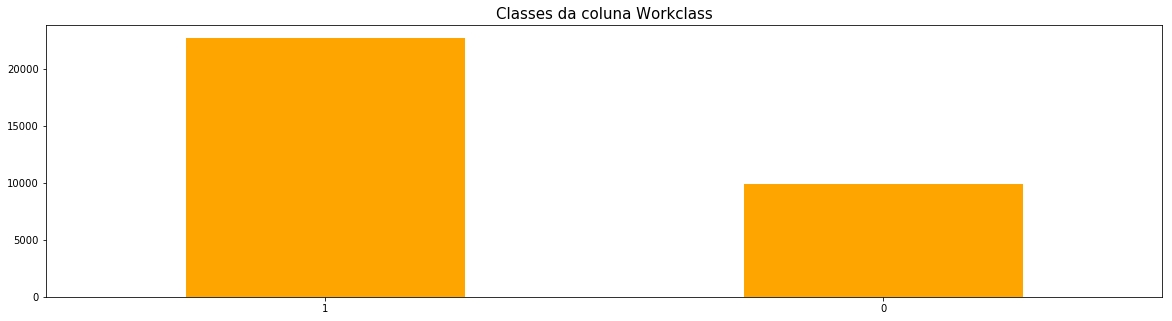

In [39]:
plt.figure(figsize=(20,5))
plt.title('Classes da coluna Workclass',size=15)
adult['workclass'].value_counts().plot.bar(color='orange')
plt.xticks(rotation='0');

### Tratando a coluna *education*

A ordem academica segue a seguinte ordem :

*Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate*.

Dividiremos assim:

**Quem ainda não terminou o ensino médio**: Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th e 12th

**Quem terminou o ensino médio**: HS-grad e Prof-school

**Quem é associado**: Assoc-acdm e Assoc-voc

**Quem está cursando ou já terminou alguma falcudade**: Some-college e Bachelors

**E quem tem pós-graduação**: Masters e Doctorate

Assim teremos 5 categorias e não mais 16. Abaixo podemos ver essas 16 classes.

In [40]:
adult['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

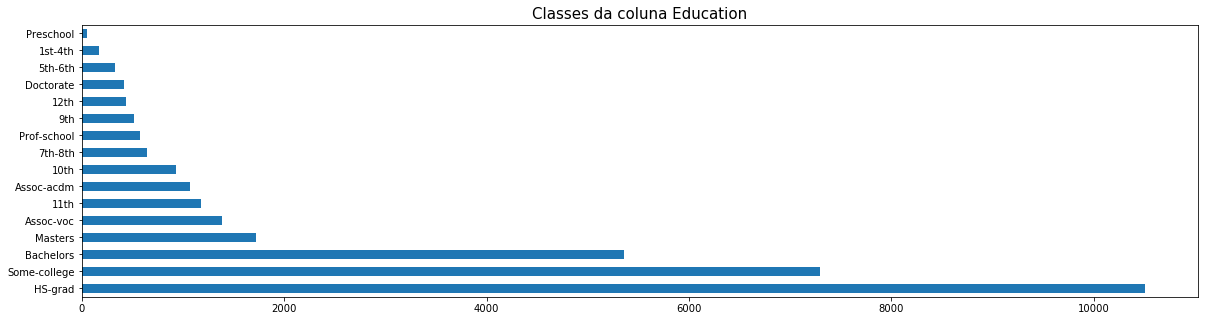

In [41]:
plt.figure(figsize=(20,5))
plt.title('Classes da coluna Education',size=15)
adult['education'].value_counts().plot.barh();

Convertendo as classes para valores numéricos com o método *replace*.

In [42]:
adult['education']=adult['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],0)
adult['education']=adult['education'].replace(['HS-grad','Prof-school'],1)
adult['education']=adult['education'].replace(['Assoc-acdm','Assoc-voc'],2)
adult['education']=adult['education'].replace(['Some-college','Bachelors'],3)
adult['education']=adult['education'].replace(['Masters','Doctorate'],4)

Como podemos ver, temos apenas 5 classes.

In [43]:
adult['education'].value_counts()

3    12646
1    11077
0     4253
2     2449
4     2136
Name: education, dtype: int64

Graficamente.

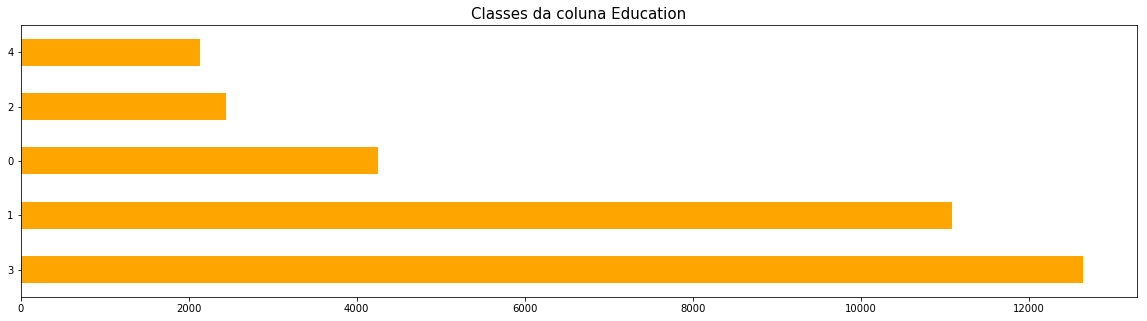

In [44]:
plt.figure(figsize=(20,5))
plt.title('Classes da coluna Education',size=15)
adult['education'].value_counts().plot.barh(color='orange');

### Tratando a coluna *marital.status*

Aqui temos uma categorias com valores muito pequenos, então podemos juntar:

1) *Married-civ-spouse ,Married-AF-spouse e Married-spouse-absent*;

2) *Divorced, Separated e Widowed*

Abaixo o número de classes atual.

In [45]:
adult['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

De forma gráfica.

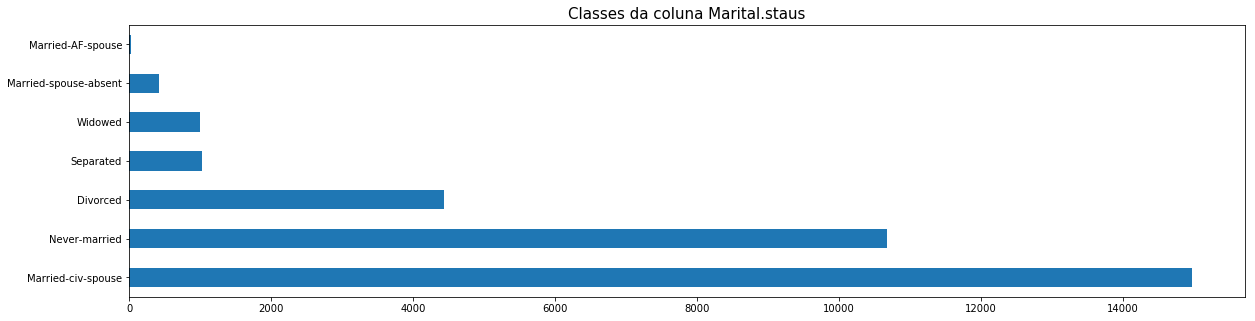

In [46]:
plt.figure(figsize=(20,5))
adult['marital.status'].value_counts().plot.barh()
plt.title("Classes da coluna Marital.staus",size=15);

Quem é casado receberá o valor 0, quem é divorciado ou separado ou viúvo receberá 1 e quem nunca se casou receberá 2.

In [47]:
adult['marital.status']=adult['marital.status'].replace(['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent'],0)
adult['marital.status']=adult['marital.status'].replace(['Divorced','Separated','Widowed'],1)
adult['marital.status']=adult['marital.status'].replace(['Never-married'],2)

Número das novas categorias da coluna *marital.status*.

In [48]:
adult['marital.status'].value_counts()

0    15417
2    10683
1     6461
Name: marital.status, dtype: int64

Visualizando graficamente.

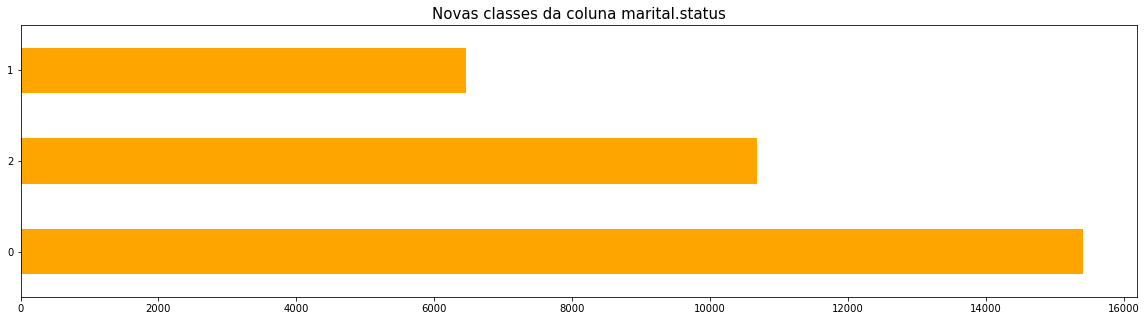

In [49]:
plt.figure(figsize=(20,5))
adult['marital.status'].value_counts().plot.barh(color='orange')
plt.title('Novas classes da coluna marital.status',size=15);

### Tratando a coluna *occupation*

Aqui temos 15 categorias e vamos agrupar algumas delas:

1) *Other-service, ?,Protective-serv,Priv-house-serv e Armed-Forces* vamos chamar de *Others*

E ficaremos com 10 categorias.

In [50]:
adult['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Gráfico dessas 15 categorias.

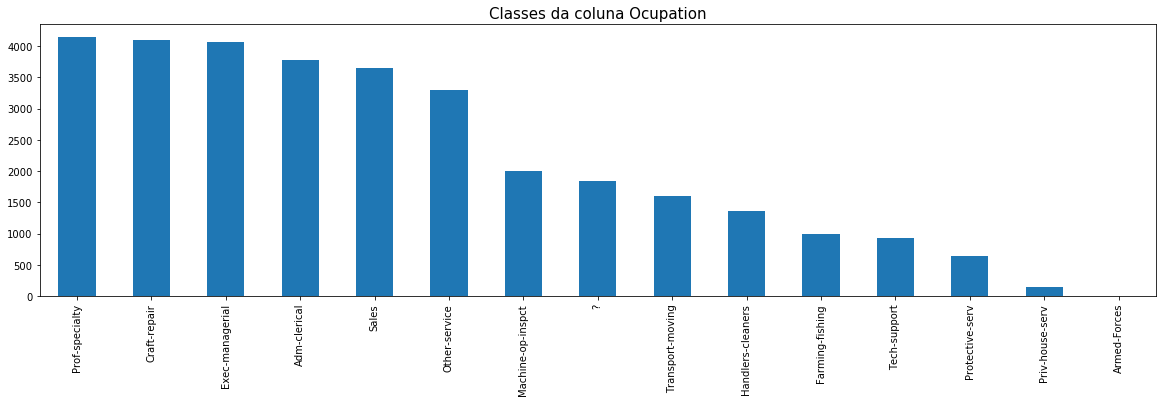

In [51]:
plt.figure(figsize=(20,5))
adult['occupation'].value_counts().plot.bar()
plt.title('Classes da coluna Ocupation',size=15);

Agrupamento das classes.

In [52]:
adult['occupation']=adult['occupation'].replace(['Other-service','?',
                                                 'Protective-serv','Priv-house-serv','Armed-Forces'],'Others')

Novas classes e seus valores.

In [53]:
adult['occupation'].value_counts()

Others               5945
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Name: occupation, dtype: int64

Vamos usar o *Label Encoder* agora para transformá-los em valores numéricos.

In [54]:
adult['occupation']=LabelEncoder().fit_transform(adult['occupation'])
adult['occupation'].value_counts()

6     5945
7     4140
1     4099
2     4066
0     3770
8     3650
5     2002
10    1597
4     1370
3      994
9      928
Name: occupation, dtype: int64

Graficamente.

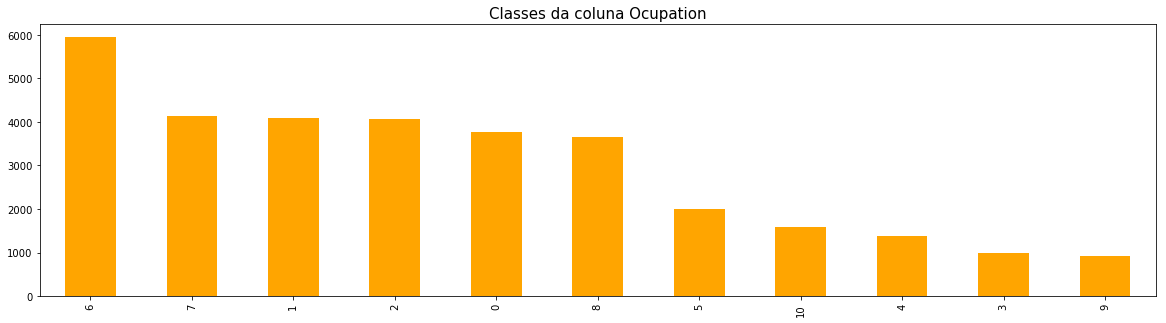

In [55]:
plt.figure(figsize=(20,5))
adult['occupation'].value_counts().plot.bar(color='orange')
plt.title('Classes da coluna Ocupation',size=15);

### Tratando a coluna *relationship*

Nessa coluna temos 6 colunas, então iremos modificar esse valor. Vamos apenas aplicar o *Label encoder*.

In [56]:
adult['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

Classes vistas graficamente.

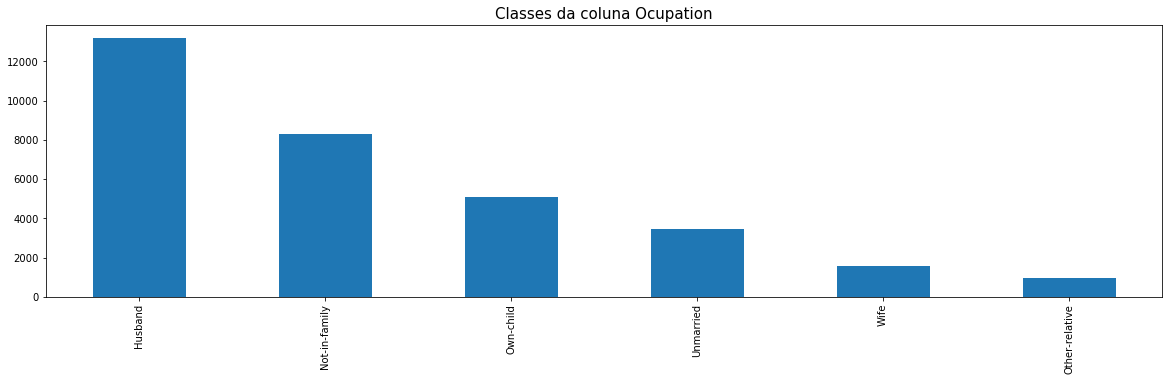

In [57]:
plt.figure(figsize=(20,5))
adult['relationship'].value_counts().plot.bar()
plt.title('Classes da coluna Ocupation',size=15);

Aplicando o *Label Encoder*.

In [58]:
adult['relationship']=LabelEncoder().fit_transform(adult['relationship'])
adult['relationship'].value_counts()

0    13193
1     8305
3     5068
4     3446
5     1568
2      981
Name: relationship, dtype: int64

Não há necessidade de criarmos um gráfico com o depois, visto que alteramos apenas a rotulagem dessa coluna.

### Tratando a coluna *race*

Ao todo temos 5 raças, mas a maioria esmagadora são brancos, por isso vamos agrupar os restantes em *Others*.

Abaixo podemos ver os valores de cada raça.

In [59]:
adult['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

Forma gráfica.

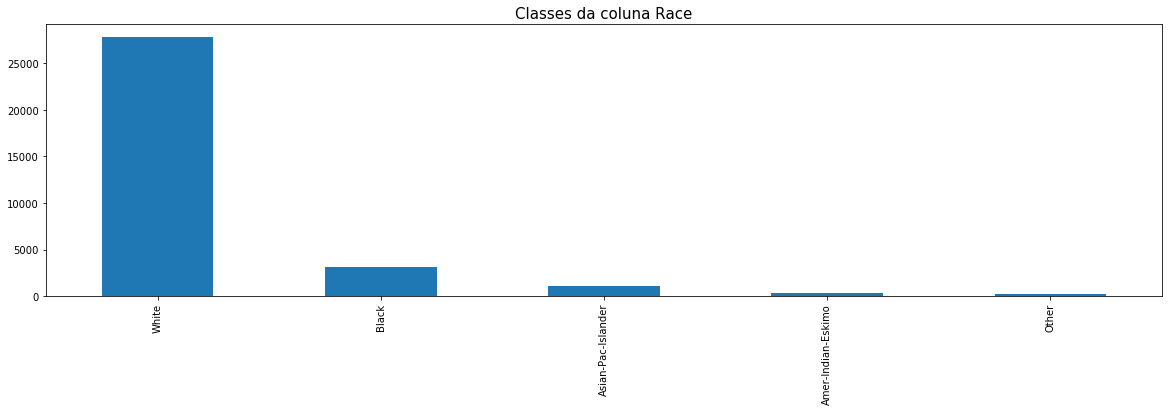

In [60]:
plt.figure(figsize=(20,5))
adult['race'].value_counts().plot.bar()
plt.title('Classes da coluna Race',size=15);

Aplicando o *replace* na coluna.

In [61]:
adult['race']=adult['race'].replace(['Black','Asian-Pac-Islander',
                                                 'Amer-Indian-Eskimo','Other'],0)

adult['race']=adult['race'].replace('White',1)

Novas classes e novos valores.

Vamos que os brancos continuam sendo uma maioria esmagadora, sendo quase 6 vezes o número de outras etnias.

In [62]:
adult['race'].value_counts()

1    27816
0     4745
Name: race, dtype: int64

Visualizando graficamente.

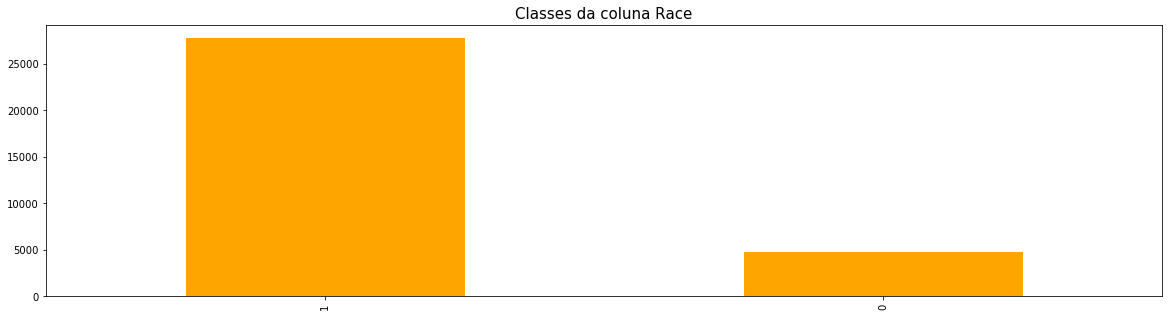

In [63]:
plt.figure(figsize=(20,5))
adult['race'].value_counts().plot.bar(color='orange')
plt.title('Classes da coluna Race',size=15);

### Tratando a coluna *sex*

Temos apenas 2 categorias de sexo: masculino (*male*) e feminino (*female*). Por esse motivo iremos apenas aplicar o *Label Encoder* nos dados.

In [64]:
adult['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [65]:
adult['sex']=LabelEncoder().fit_transform(adult['sex'])
adult['sex'].value_counts()

1    21790
0    10771
Name: sex, dtype: int64

### Tratando a coluna *native.country*

Já fizemos uma transformação anteriormente nos dados e iremos apenas aplicar o *Label Encoder*, pois temos apenas 2 classes (*United-States* e *Others*).

In [66]:
adult['native.country'].value_counts()

United-States    29170
Others            3391
Name: native.country, dtype: int64

In [67]:
adult['native.country']=LabelEncoder().fit_transform(adult['native.country'])
adult['native.country'].value_counts()

1    29170
0     3391
Name: native.country, dtype: int64

### Tratando as colunas *capital.gain, capital.loss e saldo*

Visualizando as colunas *capital.gain, capital.loss* e saldo.

In [68]:
adult[['capital.gain','capital.loss','saldo']].head()

,capital.gain,capital.loss,saldo
0,0,4356,-4356
1,0,4356,-4356
2,0,4356,-4356
3,0,3900,-3900
4,0,3900,-3900


Aqui substituiremos, onde saldo for menor igual a zero, é porque houve perda de capital e onde for 1 é por que houve ganho de capital.

In [69]:
adult.loc[ adult['saldo'] <= 0, 'saldo'] = 0
adult.loc[ adult['saldo'] > 0, 'saldo'] = 1

Visualizando novamente.

In [70]:
adult[['capital.gain','capital.loss','saldo']].head()

,capital.gain,capital.loss,saldo
0,0,4356,0
1,0,4356,0
2,0,4356,0
3,0,3900,0
4,0,3900,0


Aqui vemos que temos apenas 2 categorias onde, a maioria das pessoas, não ganharam ou perderam capital.

In [71]:
adult['saldo'].value_counts()

0    29849
1     2712
Name: saldo, dtype: int64

Agora vamos transformar a coluna *saldo* em valor inteiro.

In [72]:
adult['saldo']=adult['saldo'].astype(int)

E, por fim, excluiremos as colunas *capital.gain* e *capital.loss*.

In [73]:
adult=adult.drop(['capital.gain','capital.loss'],axis=1)

### Tratando a coluna *hours.per.week*

Na coluna *hours.per.week* vimos que temos horas por trabalho que em sua maioria estão concentrados em 40 horas, mas há aqueles que trabalham menos que 40h e aqueles que trabalham mais de 40 horas.

In [74]:
adult.loc[ adult['hours.per.week'] < 40, 'hours.per.week'] = 0
adult.loc[ adult['hours.per.week'] == 40, 'hours.per.week'] = 1
adult.loc[ adult['hours.per.week'] > 40, 'hours.per.week'] = 2

Agora segregamos em 3 classes a coluna *hour.per.week*, onde a maior parte são daqueles que trabalham 40 horas semanais.

In [75]:
adult['hours.per.week'].value_counts()

1    15217
2     9581
0     7763
Name: hours.per.week, dtype: int64

Visualizando graficamente.

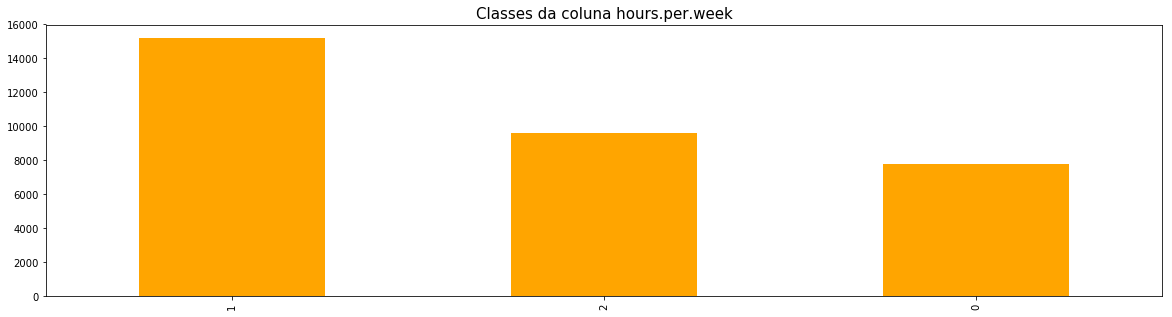

In [76]:
plt.figure(figsize=(20,5))
adult['hours.per.week'].value_counts().plot.bar(color='orange')
plt.title('Classes da coluna hours.per.week',size=15);

### Tratamento das colunas *Age* e *fnlwgt*

Para essas colunas iremos passar o processo de padronização (subtraindo dos valores a média das colunas e dividindo pelo desvio padrão).

In [77]:
lista=['age','fnlwgt']

for i in lista:
    adult[i]=(adult[i]-adult[i].mean())/adult[i].std()

### Base de dados modificada

Agora iremos visualizar a base de dados com as modificações que foram realizadas.

In [78]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,saldo
0,3.769554,0,-1.067981,1,9,1,6,1,1,0,1,1,0,0
1,3.183063,1,-0.539160,1,9,1,2,1,1,0,0,1,0,0
2,2.010079,0,-0.035219,3,10,1,6,4,0,0,1,1,0,0
3,1.130342,1,-0.468208,0,4,1,5,4,1,0,1,1,0,0
4,0.177293,1,0.709471,3,10,1,7,3,1,0,1,1,0,0


## Separando dados de treino e teste

Agora iremos separar os dados para treino e teste, antes disso iremos fazer algumas modificações. A primeira é separar as colunas que serão as *features* (características) e a coluna que será o *target* (alvo) e faremos isso logo em seguida.

In [79]:
y=adult['income']
X=adult.drop('income',axis=1)

Novamente fazendo a contagem das classes, vemos que a classe 0 representa mais de 3 vezes a classe 1.

In [80]:
np.bincount(y)

array([24720,  7841], dtype=int64)

Como observado anteriormente as classes estão desbalanceadas. Há mais sobre aqueles que ganham abaixo de US$ 50.000 do que os que ganham acima desse valor, o que pode trazer problemas para a precisão e acurácia do modelo, pois, provavelmente, ele irá aprender mais de uma classe do que de outra e, consequentemente, não terá um bom desempenho.

Vendo visualmente o problema.

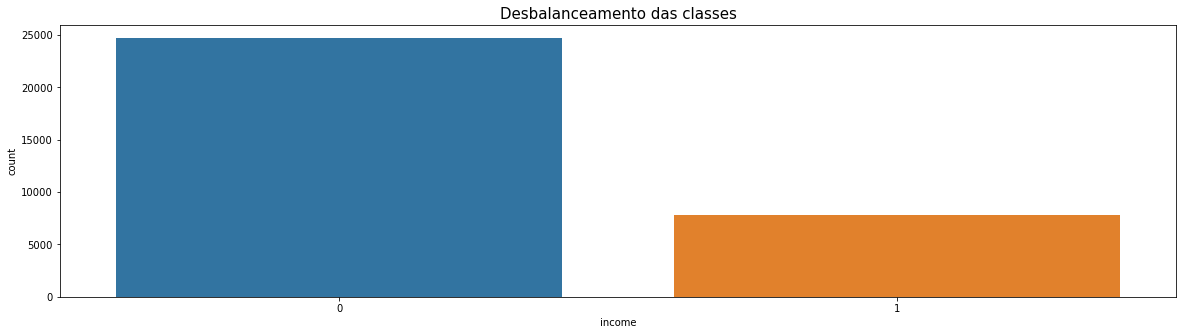

In [81]:
plt.figure(figsize=(20,5))
sns.countplot(x=y)
plt.title('Desbalanceamento das classes',size=15);

Por causa desse problema usaremos o *SMOTE*, que é uma técnica que irá gerar amostras artificiais e essas amostras serão usadas para treinar os modelos. Esse técnica tem uma desvantagem: pode fazer com que nosso(s) sofra(m) de *overfitting*.

Instanciando e aplicando o *SMOTE*.

In [82]:
smt=SMOTE()
X,y=smt.fit_sample(X,y)

Abaixo podemos ver que a classe 1 teve uma aumento, o número de observações entre as classes foi igualado.

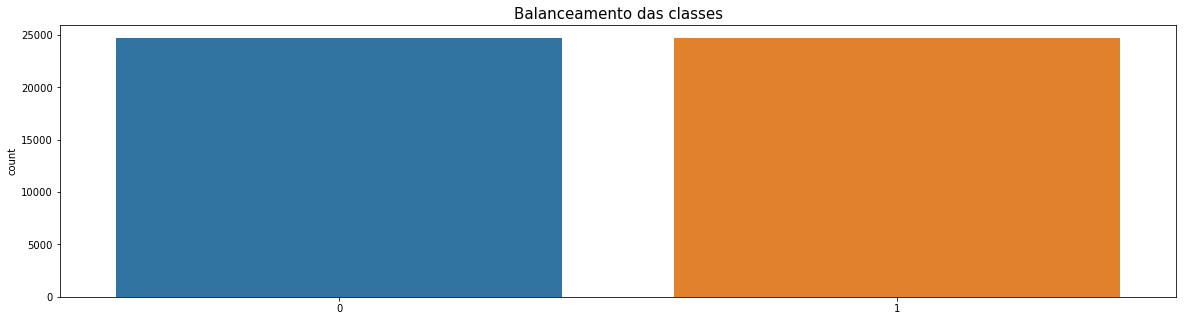

In [83]:
plt.figure(figsize=(20,5))
sns.countplot(x=y)
plt.title('Balanceamento das classes',size=15);

Dados que aplicamos uma técnica que aumenta o número de observações o nosso *dataset* sofreu uma modificação.

Verificando o *shape* (ou dimensões) da nova base.

In [84]:
display(y.shape,X.shape)

(49440,)

(49440, 13)

Vemos que temos agora 49440 observações e antes tínhamos 32561 observações.

Por fim, podemos separa os dados para teste e treino usando o método *train_test_split*, onde vamos usar 80% da base de dados para treino e 20% para teste.

Aplicando o *train_test_split*.

In [85]:
X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,random_state=42,test_size=0.2)

Dimensões das bases de treino e de teste.

In [86]:
display(X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape)

(39552, 13)

(9888, 13)

(39552,)

(9888,)

# *Baseline* do projeto

Antes de irmos para os modelos iremos gerar a *baseline* desse projeto. Usaremos o modelo de classificação mais simples que existe e determinaremos o mínimo de acurácia para os modelos treinados e testados.

Instanciando o modelo *dummy*.

In [87]:
dummy = DummyClassifier(strategy='uniform', random_state=42)

treinando o modelo.

In [88]:
dummy.fit(X_treino, y_treino)

DummyClassifier(constant=None, random_state=42, strategy='uniform')

Gerando as previsões desse modelo.

In [169]:
y_pred_dummy=dummy.predict(X_teste)

Acurácia do modelo (sem e com validação cruzada)

In [170]:
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_dummy)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score(y,cross_val_predict(dummy,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 49.585


None

Acurácia do modelo com Validação cruzada: 50.93


None

Obtendo os *scores* de treino e de teste do modelo.

Vemos que os *scores* são bem próximos, o que descarta a presença de *overfitting* nesse modelo. Entretanto esse modelo tem um apredizado baixíssimo, menor que 50%; isso indica que seria melhor usar uma moeda e tirar no cara e coroa quais são as classes desse modelo, pois teríamos um desempenho superior (50%). A mera aleatoriedade bastaria para a classificação.

In [89]:
print('O score de treino do modelo dummy é:',round(dummy.score(X_treino, y_treino)*100,3),'%')
print('O score de teste do modelo dummy é:',round(dummy.score(X_teste, y_teste)*100,3),'%')

O score de treino do modelo dummy é: 49.697 %
O score de teste do modelo dummy é: 49.585 %


Métricas de avaliação do modelo *baseline*

Vemos que para todas as classes o modelo teve uma precisão e um *recall* de 0.51, um pouco melhor do que usarmos uma moeda no cara ou coroa (mera aleatoriedade) para classificação.

In [171]:
valor_classe=[0,1]
print(classification_report(y,cross_val_predict(dummy,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51     24720
           1       0.51      0.51      0.51     24720

    accuracy                           0.51     49440
   macro avg       0.51      0.51      0.51     49440
weighted avg       0.51      0.51      0.51     49440



Olhando a curva *ROC* desse modelo vemos que desempenho péssimo, pois o valor da curva *AUC* foi de 50%, ou seja, esse modelo não tem poder de discriminação de classes.

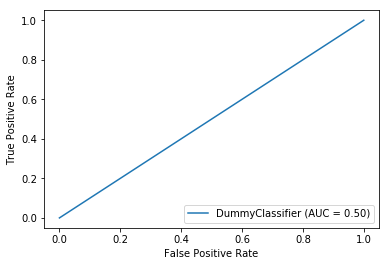

In [90]:
disp=plot_roc_curve(dummy,X_teste,y_teste)

## Modelos de Classificação

Vamos usar 10 modelos de classificação, que serão:

1) Regressão Logística;

2) *Support Vector Machine*;

3) *Extreme Gradiente Boost (XGBoost)*;

4) *Random Forest* (Floresta aleatória);

5) *Decision Tree* (Árvore de decisão);

6) *Stochastic Gradient Descent* (SGD);

7) *K-Nearest Neighbor* (KNN);

8) *Naive Bayes Gaussian*;

9) *Extra-Tree*;

10) *Multilayer Perceptron*.

#### Avaliação dos modelos

Após o treino dos modelos iremos avaliá-los comparando os valores preditos com os valores reais,com os seguintes métodos:

1) Acurácia dos modelos;

2) Matriz de confusão;

3) *Traing score* e *Test score*;

4) Métricas de avaliação (Precisão, *recall*, *f1-score*);

5) Curva *ROC* e *AUC*.

## Modelo de regressão logística

É um dos modelos mais simples de classificação. Esse modelo por meio de uma função sigmóide cria a probabilidade de ocorrência de eventos e, bom base em um corte (geralmente 0.5) classifica se o evento irá ocorrer (1) ou não (0).

Instanciando e treinando o modelo *Logistic Regression*.

In [91]:
AdultLR=LogisticRegression().fit(X_treino, y_treino)

Gerando as previsões.

In [92]:
y_pred_lr=AdultLR.predict(X_teste)

#### Avaliando o modelo de Regressão Logística

Avaliando a acurácia do modelo (com e sem *croos validation*).

In [93]:
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_lr)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score(y,cross_val_predict(AdultLR,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 80.653


None

Acurácia do modelo com Validação cruzada: 79.533


None

#### Matriz de confusão para o modelo de Regressão Logística

Para a classe 0, a regressão logística acertou 3809 e errou 1146.
Para a classe 1, a regressão logística acertou 4108 e errou 825.

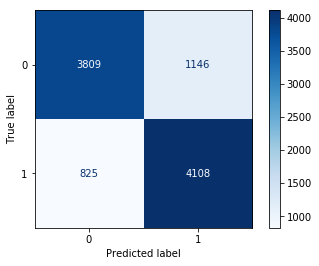

In [177]:
disp=plot_confusion_matrix(AdultLR,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### *Training score* e *Test score*

A diferença entre o *training score* e o *testing score* é pequena, então podemos descartar a presença de *overfitting* nesse modelo.

In [100]:
print('Training Score do modelo de regressão linear é :',round(AdultLR.score(X_treino,y_treino)*100,3),"%")
print('Testing Score do modelo de regressão linear é :',round(AdultLR.score(X_teste,y_teste)*100,3),"%")

Training Score do modelo de regressão linear é : 80.13 %
Testing Score do modelo de regressão linear é : 80.653 %


#### Métricas de avaliação

Para a classe 0 o modelo teve uma precisão de 82%, *recall* de 75% e um *f1-score* de 79%.

Para a classe 1 o modelo teve uma precisão de 77%, *recall* de 84% e um *f1-score* de 80%.

In [101]:
valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultLR,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79     24720
           1       0.77      0.84      0.80     24720

    accuracy                           0.80     49440
   macro avg       0.80      0.80      0.79     49440
weighted avg       0.80      0.80      0.79     49440



# Modelo *Support Vector Machine (SVM)*

Instanciando, treinando e gerando previsões com o modelo.

In [102]:
Adultsvm=svm.SVC().fit(X_treino,y_treino)
y_pred_svm=Adultsvm.predict(X_teste)

#### Avaliando o modelo *SVM*

#### Acurácia do modelo com e sem *cross validation*

In [103]:
display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_svm)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(Adultsvm,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 81.847


None

Acurácia do modelo com Validação cruzada: 80.914


None

#### Matriz de confusão do modelo *SVM*

Para a classe 0, o modelo SVM acertou 3686 e errou 1269.

Para a classe 1, o modelo SVM acertou 4354 e errou 579.

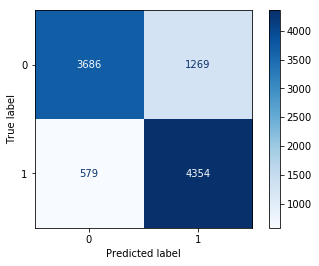

In [183]:
disp=plot_confusion_matrix(Adultsvm,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### *Training score* e *testing score*

Para o modelo *SVM* os *training score* e *testing score* também teve uma diferença pequena, então descartamos a presença de *overfitting*.

In [130]:
print('Training score do modelo SVM:',round(Adultsvm.score(X_treino,y_treino)*100,3),'%')
print('Testing score do modelo SVM:',round(Adultsvm.score(X_teste,y_teste)*100,3),'%')

Training score do modelo SVM: 81.462 %
Testing score do modelo SVM: 81.847 %


#### Métricas de Avaliação

Para a classe 0 a precisão foi de 87%, mas o *recall* ficou bem abaixo. Para a classe 1 foi o contrário: a precisão foi baixa, mas o *recall* ficou alto (89%). Essa diferença entre essas métricas mostra que esse modelo não teve um bom desempenho.

In [185]:
valor_classe=[0,1]
print(classification_report(y,cross_val_predict(Adultsvm,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     24720
           1       0.76      0.89      0.82     24720

    accuracy                           0.81     49440
   macro avg       0.82      0.81      0.81     49440
weighted avg       0.82      0.81      0.81     49440



## *XGBOOST* (Extreme Gradient Boosting)

Instanciando, treinando e gerando as previsões desse modelo.

In [106]:
AdultXGB = xgb.XGBClassifier().fit(X_treino,y_treino)
y_pred_xgb = AdultXGB.predict(X_teste)

display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_xgb)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultXGB,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 88.875


None

Acurácia do modelo com Validação cruzada: 87.354


None

#### Matriz de confusão do modelo *XGBoost*

Para a classe 0, o modelo *XGBoost* acertou 4381 e errou 574.

Para a classe 1, o modelo acertou 4397 e errou 536.

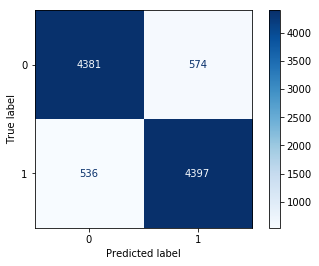

In [187]:
disp=plot_confusion_matrix(AdultXGB,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### *Training score* e *testing score*

A diferença entre o *Training score* e *testing score* é uma diferença pequena, então, também para esse modelo, rejeitamos a presença de *overfitting*.

In [135]:
print('Training score do modelo XGBoost:',round(AdultXGB.score(X_treino,y_treino)*100,3),'%')
print('Testing score do modelo XGBoost:',round(AdultXGB.score(X_teste,y_teste)*100,3),'%')

Training score do modelo XGBoost: 91.826 %
Testing score do modelo XGBoost: 88.875 %


#### Métricas de avaliação

Para esse modelo as métricas de precisão e *recall* estão mais balanceadas, então esse modelo teve um bom desempenho.

In [189]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultXGB,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     24720
           1       0.86      0.89      0.87     24720

    accuracy                           0.87     49440
   macro avg       0.87      0.87      0.87     49440
weighted avg       0.87      0.87      0.87     49440



## *Random Forest* (Floresta Aleatória)

Intanciando, treinando e gerando previsões com o modelo *Random Forest*.

In [109]:
AdultRF= RandomForestClassifier().fit(X_treino,y_treino)
y_pred_rf = AdultRF.predict(X_teste)

print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_rf)*100,3))
print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultRF,X,y,cv=10))*100,3))

Acurácia do modelo é de: 88.329
Acurácia do modelo com Validação cruzada: 87.698


#### Matriz de confusão do *Random Forest*

Para a classe 0, o modelo Random Forest acertou 4284 e errou 671.

Para a classe 1, acertou 4444 e errou 489.

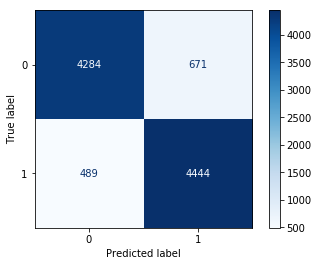

In [191]:
disp=plot_confusion_matrix(AdultRF,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### *Training score* e *testing score*

Já a diferença entre o *training score* e *testing score* possuem uma diferença grande, o que pode ser uma evidência de *overfitting* do modelo *Random Forest*, pois o modelo acertou muito mais dos dados de treino do que dos dados de teste.

In [134]:
print('Training score do modelo Random Forest:',round(AdultRF.score(X_treino,y_treino)*100,3),'%')
print('Testing score do modelo Random Forest:',round(AdultRF.score(X_teste,y_teste)*100,3),'%')

Training score do modelo Random Forest: 99.995 %
Testing score do modelo Random Forest: 88.329 %


#### Métricas de avaliação do *Random Forest*

No modelo *Random Forest* as métricas de precisão e *recall* tiveram uma diferença relevante. Para a classe 0 a precisão ficou maior que o *recall* (0.9 > 0.84), mas para a classe 1 ocorreu o contrário (0.85 < 0.91). Mostrando que mesmo tendo um resultado alto na classificação, isso não foi um bom resultado, pois o interessante é que essas métricas tenham valores próximos.

In [111]:
valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultRF,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     24720
           1       0.85      0.91      0.88     24720

    accuracy                           0.88     49440
   macro avg       0.88      0.88      0.88     49440
weighted avg       0.88      0.88      0.88     49440



## *Decision Tree* (Árvore de Decisão)

Instanciando, treinando, gerando as previsões para o modelo e, em seguida, gerando a acutrácia do modelo sem e com validação cruzada.

In [112]:
AdultDT= DecisionTreeClassifier().fit(X_treino,y_treino)
y_pred_dt = AdultDT.predict(X_teste)

display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_dt)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultDT,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 83.728


None

Acurácia do modelo com Validação cruzada: 83.277


None

#### Matriz de confusão da *Decision Tree*

Para a classe 0, o modelo Decision Tree acertou 4138 e errou 817.

Para a classe 1, o modelo acertou 4159 e errou 774.

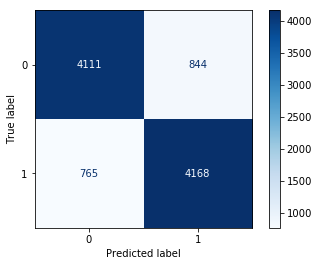

In [113]:
disp=plot_confusion_matrix(AdultDT,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### *Training score* e *testing score* da árvore de decisão

Assim como na *Random Forest* a diferença entre esses *scores* foi alta, então há presença de *overfitting*.

In [133]:
print('Training score do modelo Decision Tree:',round(AdultDT.score(X_treino,y_treino)*100,3),'%')
print('Testing score do modelo Decision Tree:',round(AdultDT.score(X_teste,y_teste)*100,3),'%')

Training score do modelo Decision Tree: 99.995 %
Testing score do modelo Decision Tree: 83.728 %


#### Métricas de Avaliação da *Decision Tree*

Aqui os resultados da precisão e do *recall* ficaram próximos.

In [197]:
valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultDT,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     24720
           1       0.82      0.85      0.83     24720

    accuracy                           0.83     49440
   macro avg       0.83      0.83      0.83     49440
weighted avg       0.83      0.83      0.83     49440



## *SGD (Stochastic Gradient Descent)*

Treinando e gerando a acurácia (sem e com validação cruzada) do modelo *Stochastic Gradient Descent*.

In [115]:
AdultSGD= SGDClassifier().fit(X_treino,y_treino)
y_pred_sgd = AdultSGD.predict(X_teste)

display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_sgd)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultSGD,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 80.37


None

Acurácia do modelo com Validação cruzada: 78.392


None

#### Matriz de confusão do modelo SGD

Para a classe 0, o modelo SGD acertou 4379 e errou 576.

Para a classe 1, acertou 3072 e errou 1861.

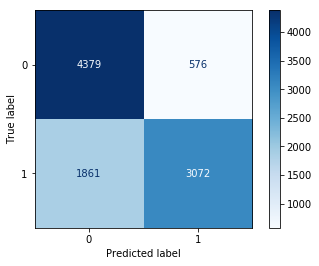

In [199]:
disp=plot_confusion_matrix(AdultSGD,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### *Training score* e *testing score*

A diferença entre os *scores* é pequena, então rejeitamos a presença de *overfitting* no modelo; mas o valor do *training score* foi menor do que o *testing score* o que indica que esse modelo pode sofrer de *underfitting* (quando o modelo não aprende bem com os dados). Note que o desempenho dele foi pior com os dados de treino, com os dados com os quais ele foi treinado.

In [132]:
print('Training score do modelo SGD:',round(AdultSGD.score(X_treino,y_treino)*100,3),'%')
print('Testing score do modelo SGD:',round(AdultSGD.score(X_teste,y_teste)*100,3),'%')

Training score do modelo SGD: 79.526 %
Testing score do modelo SGD: 80.37 %


#### Métricas de avaliação do modelo *SGD*

O desempenho de classificação para a classe 0 foi melhor que da classe 1 (precisão), mas o *recall* de cada classe está um pouco distante da precisão. Isso indica que o modelo não teve um bom desempenho também.

In [117]:
valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultSGD,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76     24720
           1       0.75      0.82      0.78     24720

    accuracy                           0.77     49440
   macro avg       0.78      0.77      0.77     49440
weighted avg       0.78      0.77      0.77     49440



# *K Nearest Neighbor* (KNN)

Instanciando, treinando o modelo, gerando as previsões e a acurácia.

In [122]:
AdultKNN= KNeighborsClassifier().fit(X_treino,y_treino)
y_pred_knn = AdultDT.predict(X_teste)

display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_knn)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultKNN,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 83.728


None

Acurácia do modelo com Validação cruzada: 85.613


None

#### Matriz de confusão do modelo *KNN*

Para a classe 0, o modelo KNN acertou 3840 e errou 1115.

Para a classe 1, acertou 4250 e errou 413.

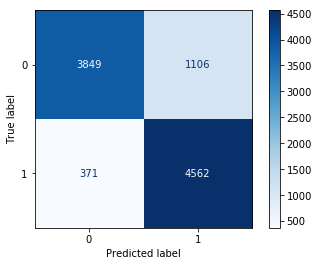

In [123]:
disp=plot_confusion_matrix(AdultKNN,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### *Training score* e *testing score*

A diferença entre essas métricas é baixa, então rejeitamos que há *overfitting* no modelo.

In [131]:
print('Training score do modelo KNN:',round(AdultKNN.score(X_treino,y_treino)*100,3),'%')
print('Testing score do modelo KNN:',round(AdultKNN.score(X_teste,y_teste)*100,3),'%')

Training score do modelo KNN: 89.459 %
Testing score do modelo KNN: 85.063 %


#### Métricas de avaliação do modelo *KNN*

Aqui vemos que a precisão e o *recall* estão muitos distantes, então esse modelo de classificação (mesmo tendo um resultado alto) não teve um bom desempenho. Podemos perceber isso no *f1-score* que para a classe 0 cai muito em relação a precisão, e sobe muito em relação a precisão para a classe 1.

In [125]:
#Métricas de avaliação

valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultKNN,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84     24720
           1       0.81      0.93      0.87     24720

    accuracy                           0.86     49440
   macro avg       0.86      0.86      0.86     49440
weighted avg       0.86      0.86      0.86     49440



## *Naive Bayes* Gaussiano

Instanciando, treinando, gerando previsões e a acurácia (sem e com *cross validation*).

In [126]:
AdultNB= GaussianNB().fit(X_treino,y_treino)
y_pred_nb = AdultNB.predict(X_teste)

display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_nb)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultNB,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 77.68


None

Acurácia do modelo com Validação cruzada: 76.594


None

#### Matriz de confusão do modelo *Naive Bayes*

Para a classe 0, o modelo Naive Bayes acertou 3739 e errou 1216.

Para a classe 1, o modelo acertou 3921 e errou 1012.

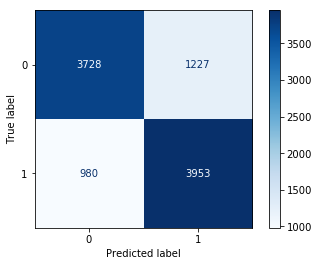

In [127]:
disp=plot_confusion_matrix(AdultNB,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### *Training score* e *testing score*

Aqui podemos considerar que pode haver *underfitting* no modelo *KNN*.

In [143]:
print('Training score do modelo Naive Bayes:',round(AdultNB.score(X_treino,y_treino)*100,3),'%')
print('Testing score do modelo Naive Bayes:',round(AdultNB.score(X_teste,y_teste)*100,3),'%')

Training score do modelo Naive Bayes: 77.344 %
Testing score do modelo Naive Bayes: 77.68 %


#### Métricas de Avaliação do modelo *Naive Bayes*

Aqui não uma grande diferença entre as métricas, mas elas ficaram abaixo das métricas dos outros modelos.

In [136]:
valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultNB,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76     24720
           1       0.76      0.77      0.77     24720

    accuracy                           0.77     49440
   macro avg       0.77      0.77      0.77     49440
weighted avg       0.77      0.77      0.77     49440



## *Extra Tree*

Gerando a acurácia (sem e com *cross validation*) da *Extra Tree*.

In [140]:
AdultET=ExtraTreesClassifier().fit(X_treino,y_treino)
y_pred_et =AdultET.predict(X_teste)

display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_et)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultET,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 88.329


None

Acurácia do modelo com Validação cruzada: 87.909


None

#### Matriz de confusão da *Extra Tree*

Para a classe 0, o modelo Extra Tree acertou 4272 e errou 683.

Para a classe 1, acertou 4454 e errou 479.

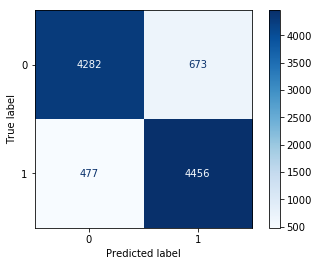

In [138]:
disp=plot_confusion_matrix(AdultET,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### *Training score* e *testing score*

Assim como os modelos *Random Forest* e *Decision Tree*, o modelo do tipo árvore *Extra Tree* também está com presença de *overfitting*.

In [139]:
print('Training score do modelo Extra Tree:',round(AdultET.score(X_treino,y_treino)*100,3),'%')
print('Testing score do modelo Extra Tree:',round(AdultET.score(X_teste,y_teste)*100,3),'%')

Training score do modelo Extra Tree: 99.995 %
Testing score do modelo Extra Tree: 88.37 %


#### Métricas de avaliação do modelo *Extra Tree*

E nas métricas de avaliação a diferença entre a precisão e o *recall* de cada classe são significativas.

In [142]:
valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultET,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88     24720
           1       0.85      0.92      0.88     24720

    accuracy                           0.88     49440
   macro avg       0.88      0.88      0.88     49440
weighted avg       0.88      0.88      0.88     49440



## MLP (*Multilayer Perceptron*)

Essa é a rede neural que está disponível na biblioteca *Scikit-Learn*.

Treinando o modelo e gerando a acurácia.

In [141]:
AdultMLP= MLPClassifier().fit(X_treino,y_treino)
y_pred_mlp= AdultMLP.predict(X_teste)

display(print("Acurácia do modelo é de:",round(accuracy_score(y_teste,y_pred_mlp)*100,3)))
display(print("Acurácia do modelo com Validação cruzada:", round(accuracy_score
                                                                 (y,cross_val_predict(AdultMLP,X,y,cv=10))*100,3)))

Acurácia do modelo é de: 83.728


None

Acurácia do modelo com Validação cruzada: 82.996


None

#### Matriz de confusão do *Multilayer Perceptron*

Para a classe 0, o modelo MLP acertou 3871 e errou 1084.

Para a classe 1, acertou 4382 e errou 551.

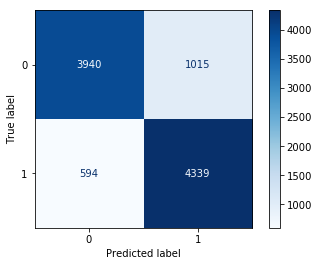

In [145]:
disp=plot_confusion_matrix(AdultMLP,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### *Training score* e *testing score*

O *training score* e *testing score* estão bem próximos, então descartamos a presença de *overfitting* nesse modelo.

In [144]:
print('Training score do modelo Multilayer Perceptron:',round(AdultMLP.score(X_treino,y_treino)*100,3),'%')
print('Testing score do modelo Multilayer Perceptron:',round(AdultMLP.score(X_teste,y_teste)*100,3),'%')

Training score do modelo Multilayer Perceptron: 84.754 %
Testing score do modelo Multilayer Perceptron: 83.728 %


#### Métricas de avaliação do MLP

In [146]:
valor_classe=[0,1]
print(classification_report(y,cross_val_predict(AdultMLP,X,y,cv=10),valor_classe))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82     24720
           1       0.81      0.87      0.84     24720

    accuracy                           0.83     49440
   macro avg       0.83      0.83      0.83     49440
weighted avg       0.83      0.83      0.83     49440



## Curva *ROC*

A curva *ROC* mostra o quão bom modelo consegue distinguir entre as classes, que nosso caso é 0 (de abaixo de USS 50.000) e 1 (acima de USS 50.000). 

Observando a curva *ROC*, vemos que os melhores modelos (que passam de 0.9) são os modelos *XGBClassifier*, *RandomForestClassifier*, *KNeighborsClassifier*, *ExtraTresClassifier* e *MLPClassifier*. O melhor modelo foi o *XGBoost* com um *AUC* (área abaixo da curva *ROC*) de 0.96, que é resultado considerado excepcional.

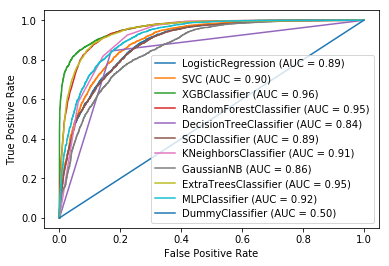

In [147]:
disp=plot_roc_curve(AdultLR,X_teste,y_teste)
plot_roc_curve(Adultsvm,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultXGB,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultRF,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultDT,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultSGD,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultKNN,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultNB,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultET,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(AdultMLP,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(dummy,X_teste,y_teste, ax=disp.ax_);

## Conclusão

### Tabela comparativa

Na tabela abaixo podemos observar o desempenho de cada modelo.


|  || Acurácia || Acurácia CV  || *training score* || *testing score* || *Overfitting* ou *Underfitting* ?   ||  *Precision* 0 ||*Precision 1*|| *AUC* ||
|:--------:||:-----------:||:------------:||:-----------:||:-----------:||:------------:||:------------:||:---------:||:---:||
|Reg. Log   || 80.653     ||  79.533      ||   80.130    ||  80.653     ||   Não        ||  82          ||  77       ||  89 ||
|SVM        || 81.845     ||  80.914      ||  81.462     ||  81.847     ||   Não        ||  87          ||  76       ||  90 ||
|XGBoost    || 88.875     ||  87.354      ||  91.826     ||    88.875   ||   Não        || 88           || 86        ||  96 ||
|Random Forest|| 88.329   ||  87.698      ||   99.995    ||  88.329     || *Overfitting*||   90         ||  85       || 95  ||
|Dec. Tree  || 83.728     ||  83.277      ||   99.995    ||  83.728     || *Overfitting*||    85        ||   82      ||  84 ||
|SGD        || 80.370     ||  78.392      ||    79.526   ||    80.370   || *Underfitting*||   80        ||   75      || 89  ||
|KNN        ||  83.728    ||  85.613      ||    89.459   ||    85.063   ||  Não         ||    92        ||   81      ||  91 ||
|Naive Bayes||  77.680    ||  76.594      ||   77.344    ||   77.680    || *Underfitting* ||   77       ||   76      ||  86 ||
|Extra Tree || 88.329     ||  87.909      ||  99.995     ||   88.370    || *Overfitting*  ||   91       ||  85       || 95  ||
|MLP        ||  83.728    ||  82.996      ||   84.754    ||   83.728    ||  Não         ||   86         ||   81      || 92  ||

Acima podemos ver que existem modelos, que quando foi aplicado o *SMOTE* acabaram tendo *overfitting*, ou seja, um sobreajuste do modelo. Vemos isso pela diferença entre o *training score* e o *testing score* que (por arbitrariedade) tiveram uma diferença superior a 10 pontos, que foram os modelos *Random Forest, Decision Tree e Extra Tree*. Por esse motivo estamos descartando esses modelos, mesmo obtendo bons desempenhos. O sobreajuste (*overfitting*) atrapalha que o modelo se torne generalizável.

Outros dois modelos possuem suspeita de *underfitting* (quando o modelo não aprende bem com os dados) o que também impede sua generalização. Podemos perceber isso, pois esses modelos possuem os menores *testing scores* e *training scores*.

Restam-nos então 5 modelos, que não apresentaram nenhum dos problemas acima.

|  || Acurácia || Acurácia CV  || *training score* || *testing score* || *Overfitting* ou *Underfitting*    ||  *Precision* 0 ||*Precision 1*|| *AUC* ||
|:--------:||:-----------:||:------------:||:-----------:||:-----------:||:------------:||:------------:||:---------:||:---:||
|**XGBoost**|| **88.875**||**87.354**      ||**91.826**||**88.875**   ||**Não**    || **88**       || **86**       || **96** ||
|KNN        ||  83.728    ||  85.613      ||    89.459   ||    85.063   ||  Não         ||    92        ||   81      ||  91 ||
|MLP        ||  83.728    ||  82.996      ||   84.754    ||   83.728    ||  Não         ||   86         ||   81      || 92  ||
|SVM        || 81.845     ||  80.914      ||  81.462     ||  81.847     ||   Não        ||  87          ||  76       ||  90 ||
|Reg. Log   || 80.653     ||  79.533      ||   80.130    ||  80.653     ||   Não        ||  82          ||  77       ||  89 ||


Desses modelos o melhor foi o XGBoost, pois obteve a melhor acurácia, não apresentou nem sobreajuste nem subajuste, teve precisões para as classes próximas do 90% e com valores aproximados, e teve o maior *AUC*; o *recall* e o *f1-score* também possuem valores próximo. E, por fim, esse modelo está bem acima da acurácia mínima de 49.58%.


Podemos também comparar esses modelos utilizando o *cross validation* e analisando os gráficos *boxplots* desses resultados.

Vamos primeiro criar uma lista com o nome abreviado dos modelos e os modelos instanciados.

In [165]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SGD', SGDClassifier()))
models.append(('EXT', ExtraTreesClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('MLP', MLPClassifier()))

Aqui vamos criar duas listas em que serão inseridas os resultados do *cross validation* e o nome dos modelos. Passaremos um *for loop* e treinaremos com a nossa base de dados cada um dos algoritmos e aplicaremos a validação cruzada.

Logo em seguida será gerada a média da validação cruzada de cada algoritmo e o desvio-padrão.

In [166]:
resultados = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    resultados.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.801477 (0.005404)
RF: 0.879703 (0.004504)
KNN: 0.847037 (0.005857)
DT: 0.836165 (0.005689)
NB: 0.773615 (0.006911)
SGD: 0.779000 (0.031906)
EXT: 0.882459 (0.004724)
XGB: 0.888704 (0.005785)
MLP: 0.839199 (0.006262)


Como vimos em nossa análise anterior o modelo que deu o melhor resultado foi *XGBoost* com uma validação cruzada média de 88.87% e com um desvio-padrão de 0.004724 (o segundo menor dos modelos).

Agora iremos plotar o gráficos *boxplots* de cada uma das validações cruzadas dos modelos.

Conforme vemos o de melhor resultado (o gráfico *boxplot* mais elevado) é o modelo *XGBoost*.

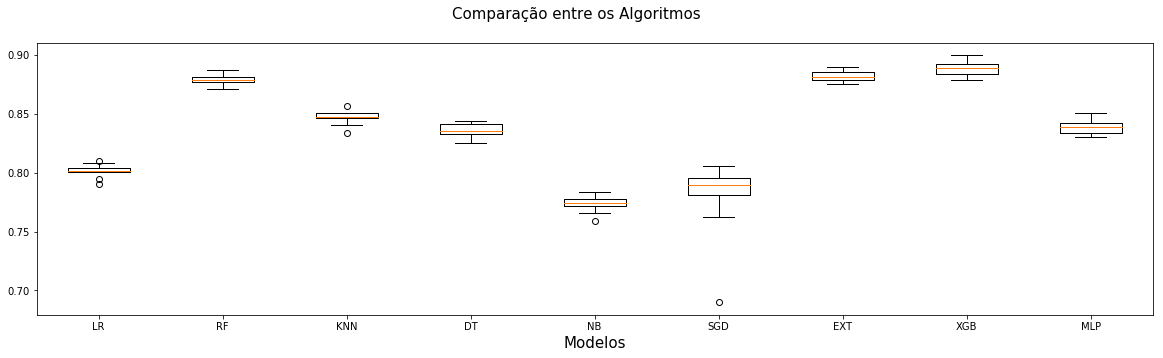

In [168]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Comparação entre os Algoritmos',size=15)
ax = fig.add_subplot(111)
plt.xlabel('Modelos',size=15)
plt.boxplot(resultados)
ax.set_xticklabels(names)
plt.show()